# How quickly does semantics change

In [2]:
from koselleck import *

In [3]:
def dopercentile(obj): return percentileofscore(obj[0], obj[1])

def get_rate_of_change_data(key='dist_local'):
    df=pd.read_pickle('data/data.semantic_change_over_decades.1run.v2.pkl')
    df['period']=[f'{x[:4]}s->{y[:4]}s' for x,y in zip(df.period1,df.period2)]
    df['period_int1']=[int(y[:4]) for y in df.period1]
    df['period_int2']=[int(y[:4]) for y in df.period2]    
    return df

In [4]:
df=get_rate_of_change_data()
df

word     rank       perc      dist  \
0       repose     3.25  99.924344  2.011760   
1        agent    10.75  99.672159  1.447165   
2         heft    18.75  99.403161  1.406349   
3       policy    19.75  99.369536  1.512577   
4     marriage    22.00  99.293880  1.057075   
...        ...      ...        ...       ...   
5984    system  5838.25   2.533812 -0.228749   
5985     table  5847.00   2.387711 -0.226005   
5986    island  5871.75   1.974453 -0.234311   
5987      spot  5886.75   1.723994 -0.226630   
5988  sympathy  5931.75   0.972616 -0.233889   

                                    neighborhood1_local  \
0     -cloak, -chariot, -dun, -velvet, -mule, -bride...   
1     -rebel, -adultery, -tribute, -digest, -resigna...   
2     -honey, -beef, -site, -tag, -bacon, -pine, -ba...   
3     -ministry, -purity, -preservation, -institutio...   
4     -election, -lady, -chancellor, -throne, -princ...   
...                                                 ...   
5984  principle, method, constitution, organization,...   
5985  tray, shelf, stool, sideboard, sofa, mantelpie...   
5986  mainland, coast, archipelago, peninsula, colon...   
5987  hillside, mound, cairn, beach, crag, shore, pr...   
5988  affection, feeling, gratitude, admiration, fer...   

                                    neighborhood2_local  rank_abstractness  \
0     +safety, +welfare, +tranquillity, +prosperity,...                1.0   
1     +villa, +churchyard, +gel, +abbey, +raid, +bal...                6.0   
2     +moderation, +purity, +advancement, +schism, +...                4.0   
3     +allowance, +marriage, +payment, +zoo, +entran...                2.0   
4     +office, +policy, +payment, +benefit, +claim, ...               71.0   
...                                                 ...                ...   
5984  principle, method, legislation, constitution, ...             5771.0   
5985  tray, sideboard, mantelpiece, sofa, shelf, cus...             5744.0   
5986  archipelago, coast, mainland, peninsula, promo...             5913.0   
5987  hillside, promontory, shore, mound, ground, pl...             5734.0   
5988  affection, admiration, feeling, earnestness, g...             5860.0   

      rank_noiseaware  rank_procrustes  rank_local  ...  z_abstractness  \
0                 3.0              5.0         4.0  ...        6.290421   
1                11.0             13.0        13.0  ...        4.211257   
2                31.0             24.0        16.0  ...        4.231960   
3                41.0             28.0         8.0  ...        4.622100   
4                 9.0              3.0         5.0  ...        2.523097   
...               ...              ...         ...  ...             ...   
5984           5950.0           5952.0      5680.0  ...       -0.966805   
5985           5900.0           5910.0      5834.0  ...       -0.963023   
5986           5870.0           5894.0      5810.0  ...       -0.999605   
5987           5926.0           5934.0      5953.0  ...       -0.961272   
5988           5936.0           5946.0      5985.0  ...       -0.988022   

      is_clean_noiseaware  z_noiseaware  z_procrustes   z_local    period1  \
0                   False      3.916678      3.962273  8.368451  1700-1710   
1                    True      3.610455      3.641559  5.391975  1700-1710   
2                    True      2.875589      2.954555  4.519601  1700-1710   
3                   False      2.583811      2.915612  6.381838  1700-1710   
4                   False      3.711755      3.975014  7.565473  1700-1710   
...                   ...           ...           ...       ...        ...   
5984                 True     -1.182813     -1.184553 -0.476323  1870-1880   
5985                 True     -1.128902     -1.138327 -0.500592  1870-1880   
5986                 True     -1.102564     -1.122401 -0.496588  1870-1880   
5987                 True     -1.155679     -1.157975 -0.530615  1870-1880   
5988                 True   

In [5]:
df.groupby(['period_int1','period_int2']).size()

period_int1  period_int2
1700         1710           2974
             1720           2800
             1730           3195
             1740           3181
             1750           3198
                            ... 
1860         1870           5980
             1880           5980
             1890           5980
1870         1880           5989
             1890           5989
Length: 188, dtype: int64

In [6]:
(df['period_int2']<df['period_int1']).value_counts()

False    885610
dtype: int64

In [43]:
df.sort_values('perc_local')[['word','perc_local','dist_local']].set_index('word').loc[['god','station']].groupby('word').mean()

perc_local  dist_local
word                           
god       16.847096    0.050870
station   82.443946    0.301751

In [93]:
def get_figdf1(randomize=False):
    dff=df.sample(frac=1)
    if randomize:
        for c in ['period1','period2']:
            dff[c]=list(dff[c].sample(frac=1))
    pdf=dff.groupby(['period','period1','period2']).mean().reset_index()
    pdf2=pd.DataFrame(pdf).rename(columns=dict(
        period1='period2',
        period2='period1',
    ))
    figdf=pdf.append(pdf2)
    figdf['period_int1']=figdf.period1.apply(lambda x: int(x[:4]))
    figdf['period_int2']=figdf.period2.apply(lambda x: int(x[:4]))
    figdf['perc_local_int']=figdf.dist_local.apply(lambda x: percentileofscore(figdf.dist_local, x)).apply(int)
    
    return figdf

In [94]:
# get_figdf1()

In [95]:
# get_figdf1(randomize=True)

period    period1    period2         rank       perc      dist  \
0      1700s->1710s  1700-1710  1710-1720   473.000000  84.129119  0.792253   
1      1700s->1710s  1700-1710  1720-1730  1380.166667  53.625869  0.287681   
2      1700s->1710s  1700-1710  1730-1740  1317.000000  55.749832  0.007682   
3      1700s->1710s  1700-1710  1740-1750  1233.250000  58.565905  0.149221   
4      1700s->1710s  1700-1710  1750-1760  2609.750000  12.281439 -0.145847   
...             ...        ...        ...          ...        ...       ...   
60995  1870s->1890s  1850-1860  1870-1880  2878.250000  51.957756  0.036305   
60996  1870s->1890s  1860-1870  1870-1880  3255.295455  45.662123  0.043842   
60997  1870s->1890s  1870-1880  1870-1880  3433.875000  42.680331 -0.009356   
60998  1870s->1890s  1880-1890  1870-1880  3025.250000  49.503256  0.081809   
60999  1870s->1890s  1890-1900  1870-1880  3340.050000  44.246953  0.057736   

       rank_abstractness  rank_noiseaware  rank_procrustes   rank_local  ...  \
0              94.000000       625.000000       475.000000   698.000000  ...   
1            1158.333333      1213.333333      1208.666667  1940.333333  ...   
2            2038.000000       817.000000      1237.000000  1176.000000  ...   
3            1480.000000      1033.166667      1079.500000  1340.333333  ...   
4            2461.000000      2638.000000      2554.000000  2786.000000  ...   
...                  ...              ...              ...          ...  ...   
60995        3144.333333      2855.833333      2967.833333  2545.000000  ...   
60996        3369.818182      3037.727273      3064.181818  3549.454545  ...   
60997        3201.250000      3420.500000      3436.250000  3677.500000  ...   
60998        2808.083333      3162.333333      3178.583333  2952.000000  ...   
60999        2602.600000      3957.700000      3938.300000  2861.600000  ...   

       score2_abstractness  score_diff_abstractness  z_abstractness  \
0                 0.985210                 1.238455        2.373018   
1                 0.266552                 0.593419        0.531309   
2                -0.363396                -0.210950       -0.637895   
3                 0.306809                 0.397786       -0.090406   
4                -0.138238                 0.113096       -0.924639   
...                    ...                      ...             ...   
60995             0.116934                -0.138182       -0.069444   
60996            -0.008174                -0.092172       -0.049716   
60997             0.542581                 0.054163       -0.243639   
60998            -0.100612                 0.011773        0.088298   
60999             0.358676                 0.072328        0.065530   

       is_clean_noiseaware  z_noiseaware  z_procrustes   z_local  period_int1  \
0                 1.000000      0.742151      0.963609  0.305155         1700   
1                 1.000000      0.141379      0.163190 -0.448448         1700   
2                 1.000000      0.506472      0.124451 -0.093139         1700   
3                 0.833333      0.426650      0.342987  0.033496         1700   
4                 1.000000     -1.118919     -1.039207 -0.893154         1700   
...                    ...           ...           ...       ...          ...   
60995             1.000000     -0.165021     -0.204889 -0.079345         1850   
60996             1.000000     -0.100920     -0.112242 -0.153781         1860   
60997             1.000000     -0.215634     -0.218346 -0.236642         1870   
60998             0.833333     -0.037950     -0.047605  0.028299         1880   
60999             1.000000     -0.507030     -0.500372 -0.080950         1890   

       period_int2  perc_local_int  
0             1710              31  
1             1720              16  
2             1730              23  
3             1740              25  
4             1750               6  
...            ...             ...  
60995         1870

In [164]:
def plot_fig1(figdf1=None,**y):
    if figdf1 is None: figdf1=get_figdf1(**y)
    fig=p9.ggplot(
        figdf1.fillna(0),
        p9.aes(x='factor(period_int1)',y='factor(period_int2)',fill='perc_local_int', label='perc_local_int'))
    fig+=p9.geom_tile()
    fig+=p9.geom_text(size=5)
    fig+=p9.scale_fill_distiller()
    return fig

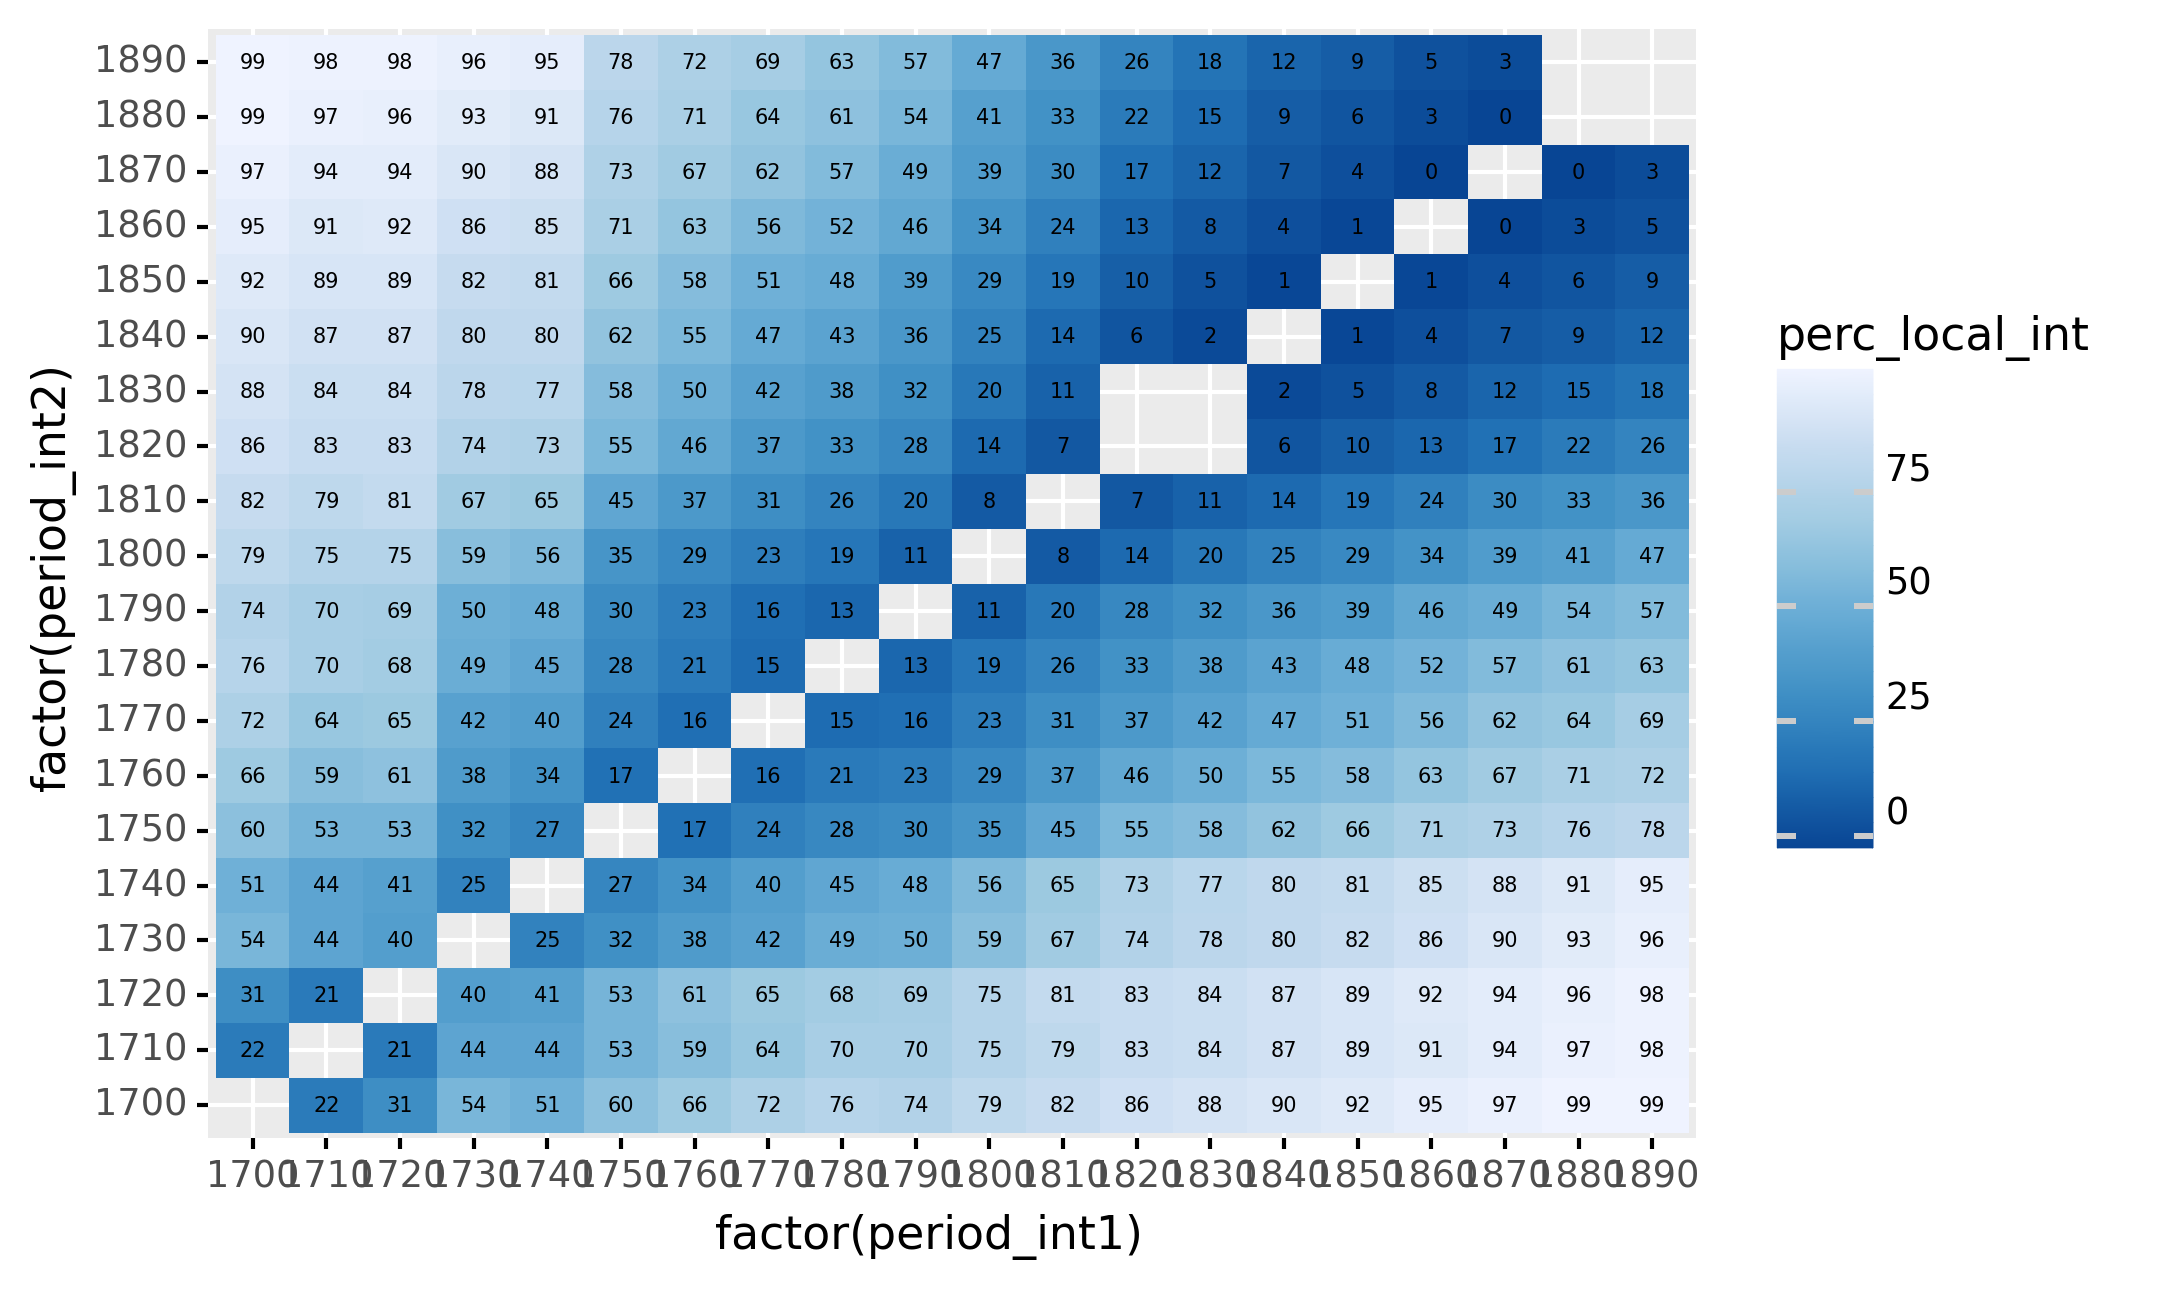

<ggplot: (8785960571021)>

In [165]:
plot_fig1()

In [166]:
# plot_fig1(randomize=True)

In [167]:
figdf2=figdf.groupby(['period_int1','period_int2']).mean().reset_index()
# figdf2=figdf.groupby(['period_int2']).mean().reset_index()
# figdf2=figdf2[figdf2.period_int1.isin({1700,1750,1800,1850})]
figdf2

period_int1  period_int2    rank       perc      dist  rank_abstractness  \
0           1700         1710  1487.5  50.016812  0.151043             1487.5   
1           1700         1720  1400.5  50.017857  0.166259             1400.5   
2           1700         1730  1598.0  50.015649  0.235051             1598.0   
3           1700         1740  1591.0  50.015718  0.228605             1591.0   
4           1700         1750  1599.5  50.015635  0.246373             1599.5   
..           ...          ...     ...        ...       ...                ...   
371         1890         1830  2964.5  50.008435  0.110093             2964.5   
372         1890         1840  2978.0  50.008396  0.094845             2978.0   
373         1890         1850  2986.0  50.008374  0.082714             2986.0   
374         1890         1860  2990.5  50.008361  0.070116             2990.5   
375         1890         1870  2995.0  50.008349  0.061226             2995.0   

     rank_noiseaware  rank_procrustes  rank_local  perc_abstractness  ...  \
0             1487.5           1487.5      1487.5          50.016812  ...   
1             1400.5           1400.5      1400.5          50.017857  ...   
2             1598.0           1598.0      1598.0          50.015649  ...   
3             1591.0           1591.0      1591.0          50.015718  ...   
4             1599.5           1599.5      1599.5          50.015635  ...   
..               ...              ...         ...                ...  ...   
371           2964.5           2964.5      2964.5          50.008435  ...   
372           2978.0           2978.0      2978.0          50.008396  ...   
373           2986.0           2986.0      2986.0          50.008374  ...   
374           2990.5           2990.5      2990.5          50.008361  ...   
375           2995.0           2995.0      2995.0          50.008349  ...   

     dist_procrustes  dist_local  score1_abstractness  score2_abstractness  \
0           0.270617    0.052175         1.073639e-16         1.049000e-16   
1           0.290684    0.070277         5.267612e-17         2.169891e-16   
2           0.396043    0.123187        -1.758287e-16         2.189172e-17   
3           0.387888    0.117156         6.903556e-17        -2.582726e-17   
4           0.411788    0.135224         2.275298e-16         0.000000e+00   
..               ...         ...                  ...                  ...   
371         0.195830    0.046759        -2.347987e-16         5.159316e-16   
372         0.171208    0.035561        -2.162267e-16         4.667469e-16   
373         0.151429    0.026844         6.775038e-17        -4.782735e-17   
374         0.130003    0.019619        -3.947418e-16         2.434734e-16   
375         0.115293    0.013682        -5.235047e-16         1.887138e-16   

     score_diff_abstractness  z_abstractness  is_clean_noiseaware  \
0              -5.685507e-17   -1.252827e-16             0.811029   
1               4.358617e-17   -3.467861e-16             0.765357   
2               1.240824e-16    2.212106e-16             0.655399   
3              -2.352135e-16    4.458343e-16             0.690663   
4              -2.029247e-16    1.774690e-16             0.619762   
..                       ...             ...                  ...   
371             3.348367e-16   -3.576386e-16             0.929487   
372             5.122215e-16   -3.129878e-16             0.942065   
373             3.195087e-16    1.483768e-16             0.954781   
374             4.387638e-16   -5.616652e-16             0.960535   
375             4.005291e-16    8.744234e-17             0.969277   

     z_noiseaware  z_procrustes       z_local  
0    6.945054e-16 -6.170063e-16  1.405884e-16  
1   -4.226778e-16  1.379769e-15 -9.445619e-16  
2   -6.824657e-17 -1.156995e-15  4.142748e-16  
3    5.071217e-16  7.625323e-16 -5.055162e-16  
4    1.008505e-15 -9.370588e-16  1.735531e-15  
..            ...           ...           ...  
371  

In [168]:
o=[]
for pi2,gdf in figdf.query('period2>period1').groupby('period_int2'):
# for pi2,gdf in figdf.groupby('period_int2'):
    gdf=gdf.sort_values('period_int1')
#     display(gdf)
    for i in range(2,len(gdf)):
        window=gdf.iloc[i-2:i+1]
#         display(window)
        windowavg=window.mean()
#         windowavg['period_int2']=int(gdf.iloc[i].period_int2)
        odx={
            'period_int1':gdf.iloc[i].period_int1,
            'period_int2':gdf.iloc[i].period_int2,
            'dist_local':windowavg.dist_local
        }
        o.append(odx)
odf=pd.DataFrame(o)
figdf3=odf.groupby('period_int2').mean().reset_index()
figdf3

period_int2  period_int1  dist_local
0          1730         1720    0.106680
1          1740         1725    0.096110
2          1750         1730    0.106653
3          1760         1735    0.108902
4          1770         1740    0.109218
5          1780         1745    0.107475
6          1790         1750    0.101672
7          1800         1755    0.108347
8          1810         1760    0.116429
9          1820         1765    0.124613
10         1830         1765    0.133989
11         1840         1775    0.123419
12         1850         1780    0.122791
13         1860         1785    0.124198
14         1870         1790    0.124283
15         1880         1795    0.124397
16         1890         1795    0.130983

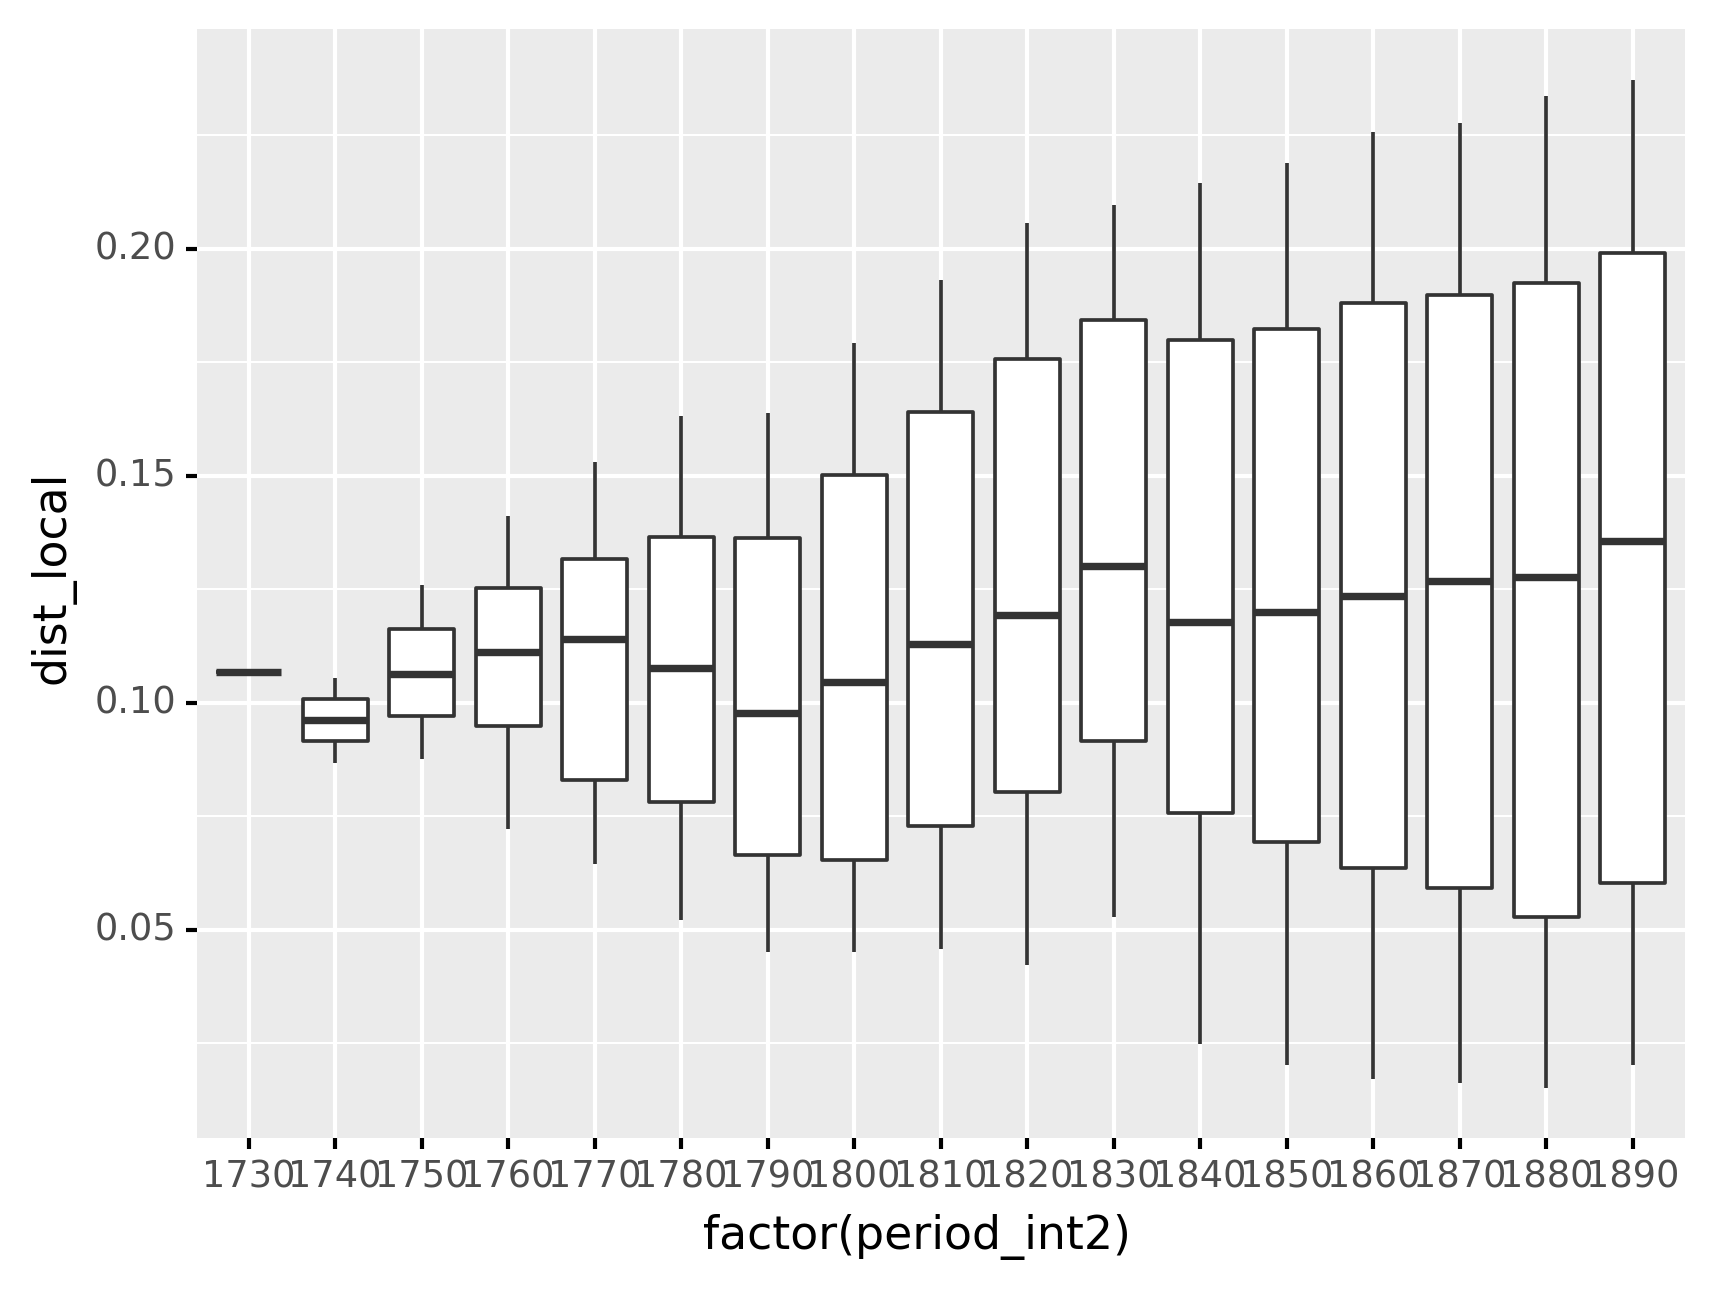

<ggplot: (8785849358929)>

In [169]:
p9.ggplot(odf, p9.aes('factor(period_int2)','dist_local')) + p9.geom_boxplot()

In [ ]:

p9.ggplot(
    odf,
    p9.aes(
        x='period_int2',
        y='dist_local',
        color='period_int1',
        fill='period_int1',
        group='period_int1'
    )
) + p9.geom_point() + p9.geom_area() + p9.geom_smooth(method='loess')

In [ ]:
distdf=figdf.pivot('period_int1','period_int2','dist_local')
distdf

In [ ]:

def plot_dendro(df):
    import plotly.figure_factory as ff
    X=df.fillna(0).values
    fig = ff.create_dendrogram(X, orientation='bottom', labels=df.index, color_threshold=.3)
    fig.update_layout(width=800, height=600)
    fig.show()

In [ ]:
plot_dendro(distdf)

### Network?

In [109]:
g=to_semnet_from_dist(distdf,topn=2)

In [110]:
# import sys
# sys.path.append('../../github/hairball/')
# import hairball as hb
# hb.__file__

In [112]:
hg=hb.Hairball(g)
hb.use_notebook()
hg.draw_bokeh()

Building df_edges from g: 100%|██████████| 25/25 [00:00<00:00, 181728.94it/s]


Loading BokehJS ...

In [30]:
hg.draw_bokeh??

Signature:
hg.draw_bokeh(
    title='Networkx Graph',
    save_to=None,
    color_by=None,
    size_by=None,
    default_color='skyblue',
    default_size=15,
    min_size=5,
    max_size=30,
)
Docstring: <no docstring>
Source:   
    def draw_bokeh(self,
        title='Networkx Graph', 
        save_to=None,
        color_by=None,
        size_by=None,
        default_color='skyblue',
        default_size=15,
        min_size=5,
        max_size=30,
    ):
        from bokeh.io import output_notebook, show, save
        from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
        from bokeh.plotting import figure
        from bokeh.plotting import from_networkx
        from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
        from bokeh.transform import linear_cmap
        from networkx.algorithms import community

        #Establish which categories will appear when hovering over each

In [19]:
hb??

Type:        module
String form: <module 'hairball' from '../../github/hairball/hairball.py'>
File:        ~/github/hairball/hairball.py
Source:     
import os,sys,json
import networkx as nx
import pandas as pd
from tqdm import tqdm
import numpy as np

def use_notebook():
    from bokeh.io import output_notebook
    output_notebook()

def is_url(x): return type(x)==str and x.strip().startswith('http')
def is_path(x): 
    return type(x) == str and os.path.exists(x)
def is_graph(x): return type(x) in {nx.Graph, nx.DiGraph}

def tupper(x): return x[0].upper()+x[1:]


def condense_booknlp_output(df=None,url=None):
    if df is None and url: df=pd.read_csv(url)
    if df is None: return None
    
    nameld=[]
    gby='name_real'
    other_cols='gender  race    class   other   notes'.split()
    for name,namedf in df.groupby(gby):
        #names=  ', '.join(tupper(x) for x in namedf.names)
        names = {tupper(nm.strip())
                 for nms in namedf.names
                 for nm 

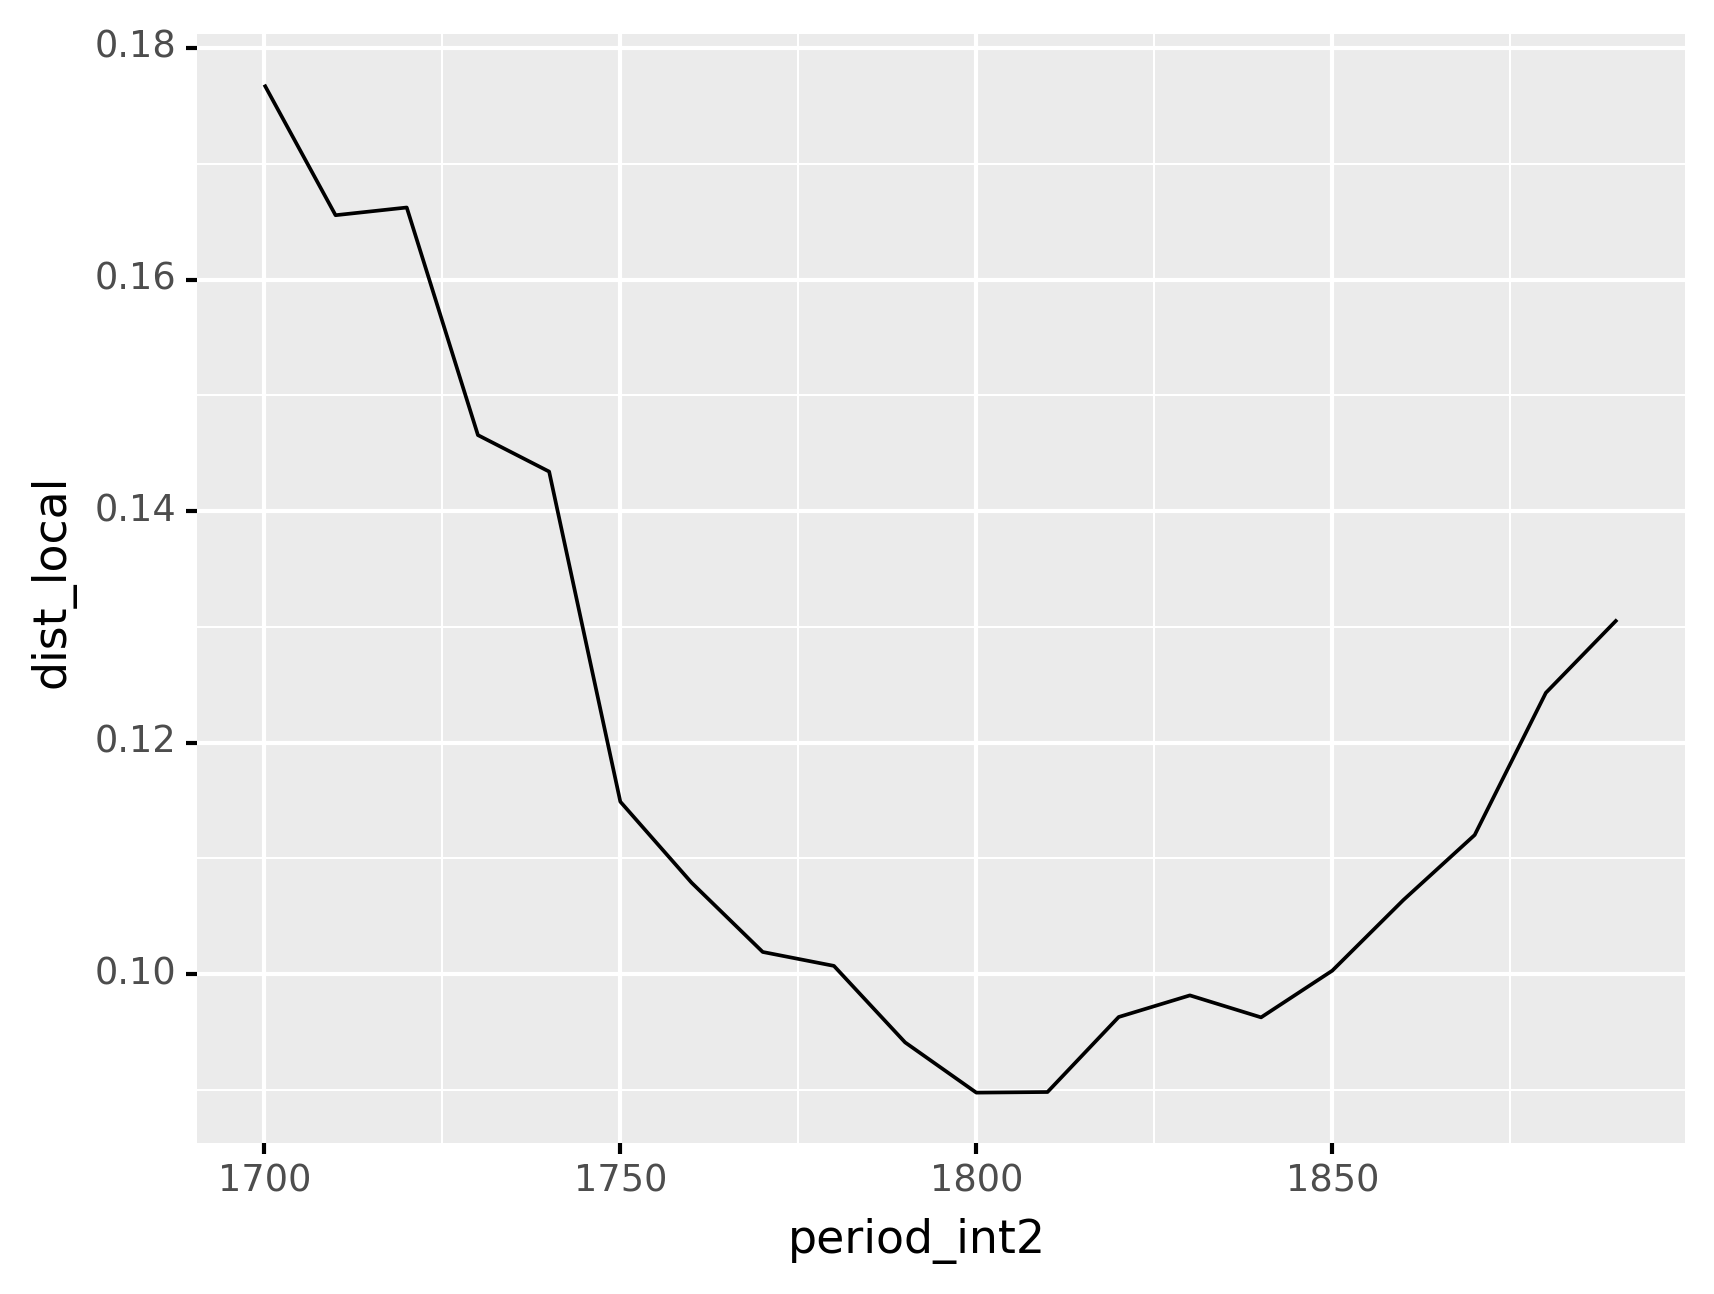

<ggplot: (8766841285949)>

In [91]:
p9.ggplot(
    figdf2,
    p9.aes(
        x='period_int2',
        y='dist_local',
    )
) + p9.geom_line()

In [35]:
pdf[pdf.period_int1==1700]

rank       perc      dist  rank_abstractness  rank_noiseaware  \
period                                                                          
1700s->1710s  1487.5  50.016812  0.151043             1487.5           1487.5   
1700s->1720s  1400.5  50.017857  0.166259             1400.5           1400.5   
1700s->1730s  1598.0  50.015649  0.235051             1598.0           1598.0   
1700s->1740s  1591.0  50.015718  0.228605             1591.0           1591.0   
1700s->1750s  1599.5  50.015635  0.246373             1599.5           1599.5   
1700s->1760s  1603.5  50.015596  0.262991             1603.5           1603.5   
1700s->1770s  1607.0  50.015562  0.274645             1607.0           1607.0   
1700s->1780s  1608.0  50.015552  0.285805             1608.0           1608.0   
1700s->1790s  1608.0  50.015552  0.284028             1608.0           1608.0   
1700s->1800s  1609.0  50.015542  0.297187             1609.0           1609.0   
1700s->1810s  1609.5  50.015538  0.308176             1609.5           1609.5   
1700s->1820s  1609.5  50.015538  0.314753             1609.5           1609.5   
1700s->1830s  1608.5  50.015547  0.316394             1608.5           1608.5   
1700s->1840s  1609.5  50.015538  0.319542             1609.5           1609.5   
1700s->1850s  1609.5  50.015538  0.321223             1609.5           1609.5   
1700s->1860s  1609.5  50.015538  0.323761             1609.5           1609.5   
1700s->1870s  1609.5  50.015538  0.325395             1609.5           1609.5   
1700s->1880s  1609.5  50.015538  0.330102             1609.5           1609.5   
1700s->1890s  1609.5  50.015538  0.331176             1609.5           1609.5   

              rank_procrustes  rank_local  perc_abstractness  perc_noiseaware  \
period                                                                          
1700s->1710s           1487.5      1487.5          50.016812        50.016812   
1700s->1720s           1400.5      1400.5          50.017857        50.017857   
1700s->1730s           1598.0      1598.0          50.015649        50.015649   
1700s->1740s           1591.0      1591.0          50.015718        50.015718   
1700s->1750s           1599.5      1599.5          50.015635        50.015635   
1700s->1760s           1603.5      1603.5          50.015596        50.015596   
1700s->1770s           1607.0      1607.0          50.015562        50.015562   
1700s->1780s           1608.0      1608.0          50.015552        50.015552   
1700s->1790s           1608.0      1608.0          50.015552        50.015552   
1700s->1800s           1609.0      1609.0          50.015542        50.015542   
1700s->1810s           1609.5      1609.5          50.015538        50.015538   
1700s->1820s           1609.5      1609.5          50.015538        50.015538   
1700s->1830s           1608.5      1608.5          50.015547        50.015547   
1700s->1840s           1609.5      1609.5          50.015538        50.015538   
1700s->1850s           1609.5      1609.5          50.015538        50.015538   
1700s->1860s           1609.5      1609.5          50.015538        50.015538   
1700s->1870s           1609.5      1609.5          50.015538        50.015538   
1700s->1880s           1609.5      1609.5          50.015538        50.015538   
1700s->1890s           1609.5      1609.5          50.015538        50.015538   

              perc_procrustes  ...  score1_abstractness  score2_abstractness  \
period                         ...                                             
1700s->1710s        50.016812  ...         1.073639e-16         1.049000e-16   
1700s->1720s        50.017857  ...         5.267612e-17         2.169891e-16   
1700s->1730s        50.015649  ...        -1.758287e-16         2.189172e-17   
1700s->1740s        50.015718  ...         6.903556e-17        -2.582726e-17   
1700s->1750s        50.015635  ...         2.275298e-16         0.000000e+00   
1700s->1760s        50.015596  ...        -8.210664e

In [17]:
pdf.rolling(3,min_periods=1).mean()

rank       perc      dist  rank_abstractness  \
period                                                              
1700s->1710s  1487.500000  50.016812  0.151043        1487.500000   
1700s->1720s  1444.000000  50.017335  0.158651        1444.000000   
1700s->1730s  1495.333333  50.016773  0.184117        1495.333333   
1700s->1740s  1529.833333  50.016408  0.209972        1529.833333   
1700s->1750s  1596.166667  50.015668  0.236676        1596.166667   
...                   ...        ...       ...                ...   
1860s->1870s  2987.500000  50.008370  0.070796        2987.500000   
1860s->1880s  2989.000000  50.008365  0.066260        2989.000000   
1860s->1890s  2990.500000  50.008361  0.062060        2990.500000   
1870s->1880s  2992.000000  50.008357  0.062509        2992.000000   
1870s->1890s  2993.500000  50.008353  0.061974        2993.500000   

              rank_noiseaware  rank_procrustes   rank_local  \
period                                                        
1700s->1710s      1487.500000      1487.500000  1487.500000   
1700s->1720s      1444.000000      1444.000000  1444.000000   
1700s->1730s      1495.333333      1495.333333  1495.333333   
1700s->1740s      1529.833333      1529.833333  1529.833333   
1700s->1750s      1596.166667      1596.166667  1596.166667   
...                       ...              ...          ...   
1860s->1870s      2987.500000      2987.500000  2987.500000   
1860s->1880s      2989.000000      2989.000000  2989.000000   
1860s->1890s      2990.500000      2990.500000  2990.500000   
1870s->1880s      2992.000000      2992.000000  2992.000000   
1870s->1890s      2993.500000      2993.500000  2993.500000   

              perc_abstractness  perc_noiseaware  perc_procrustes  ...  \
period                                                             ...   
1700s->1710s          50.016812        50.016812        50.016812  ...   
1700s->1720s          50.017335        50.017335        50.017335  ...   
1700s->1730s          50.016773        50.016773        50.016773  ...   
1700s->1740s          50.016408        50.016408        50.016408  ...   
1700s->1750s          50.015668        50.015668        50.015668  ...   
...                         ...              ...              ...  ...   
1860s->1870s          50.008370        50.008370        50.008370  ...   
1860s->1880s          50.008365        50.008365        50.008365  ...   
1860s->1890s          50.008361        50.008361        50.008361  ...   
1870s->1880s          50.008357        50.008357        50.008357  ...   
1870s->1890s          50.008353        50.008353        50.008353  ...   

              dist_local  score1_abstractness  score2_abstractness  \
period                                                               
1700s->1710s    0.052175         1.073639e-16         1.049000e-16   
1700s->1720s    0.061226         8.001999e-17         1.609446e-16   
1700s->1730s    0.081880        -5.262921e-18         1.145936e-16   
1700s->1740s    0.103540        -1.803902e-17         7.101786e-17   
1700s->1750s    0.125189         4.024552e-17        -1.311845e-18   
...                  ...                  ...                  ...   
1860s->1870s    0.019287        -7.844611e-17         1.124237e-16   
1860s->1880s    0.016986        -1.383556e-16        -1.917989e-16   
1860s->1890s    0.014578        -2.925196e-16        -9.469869e-17   
1870s->1880s    0.014535        -4.049614e-16        -3.476408e-17   
1870s->1890s    0.014225        -5.101699e-16         1.038356e-16   

              score_diff_abstractness  z_abstractness  is_clean_noiseaware  \
period                                                                       
1700s->1710s            -5.685507e-17   -1.252827e-16             0.811029   
1700s->1720s            -6.634450e-18   -2.360344e-16             0.788193   
1700s->1730s             3.693784e-17   -8.361940e-17             0.743928   
1700s->1740s            -2.251496e-17  

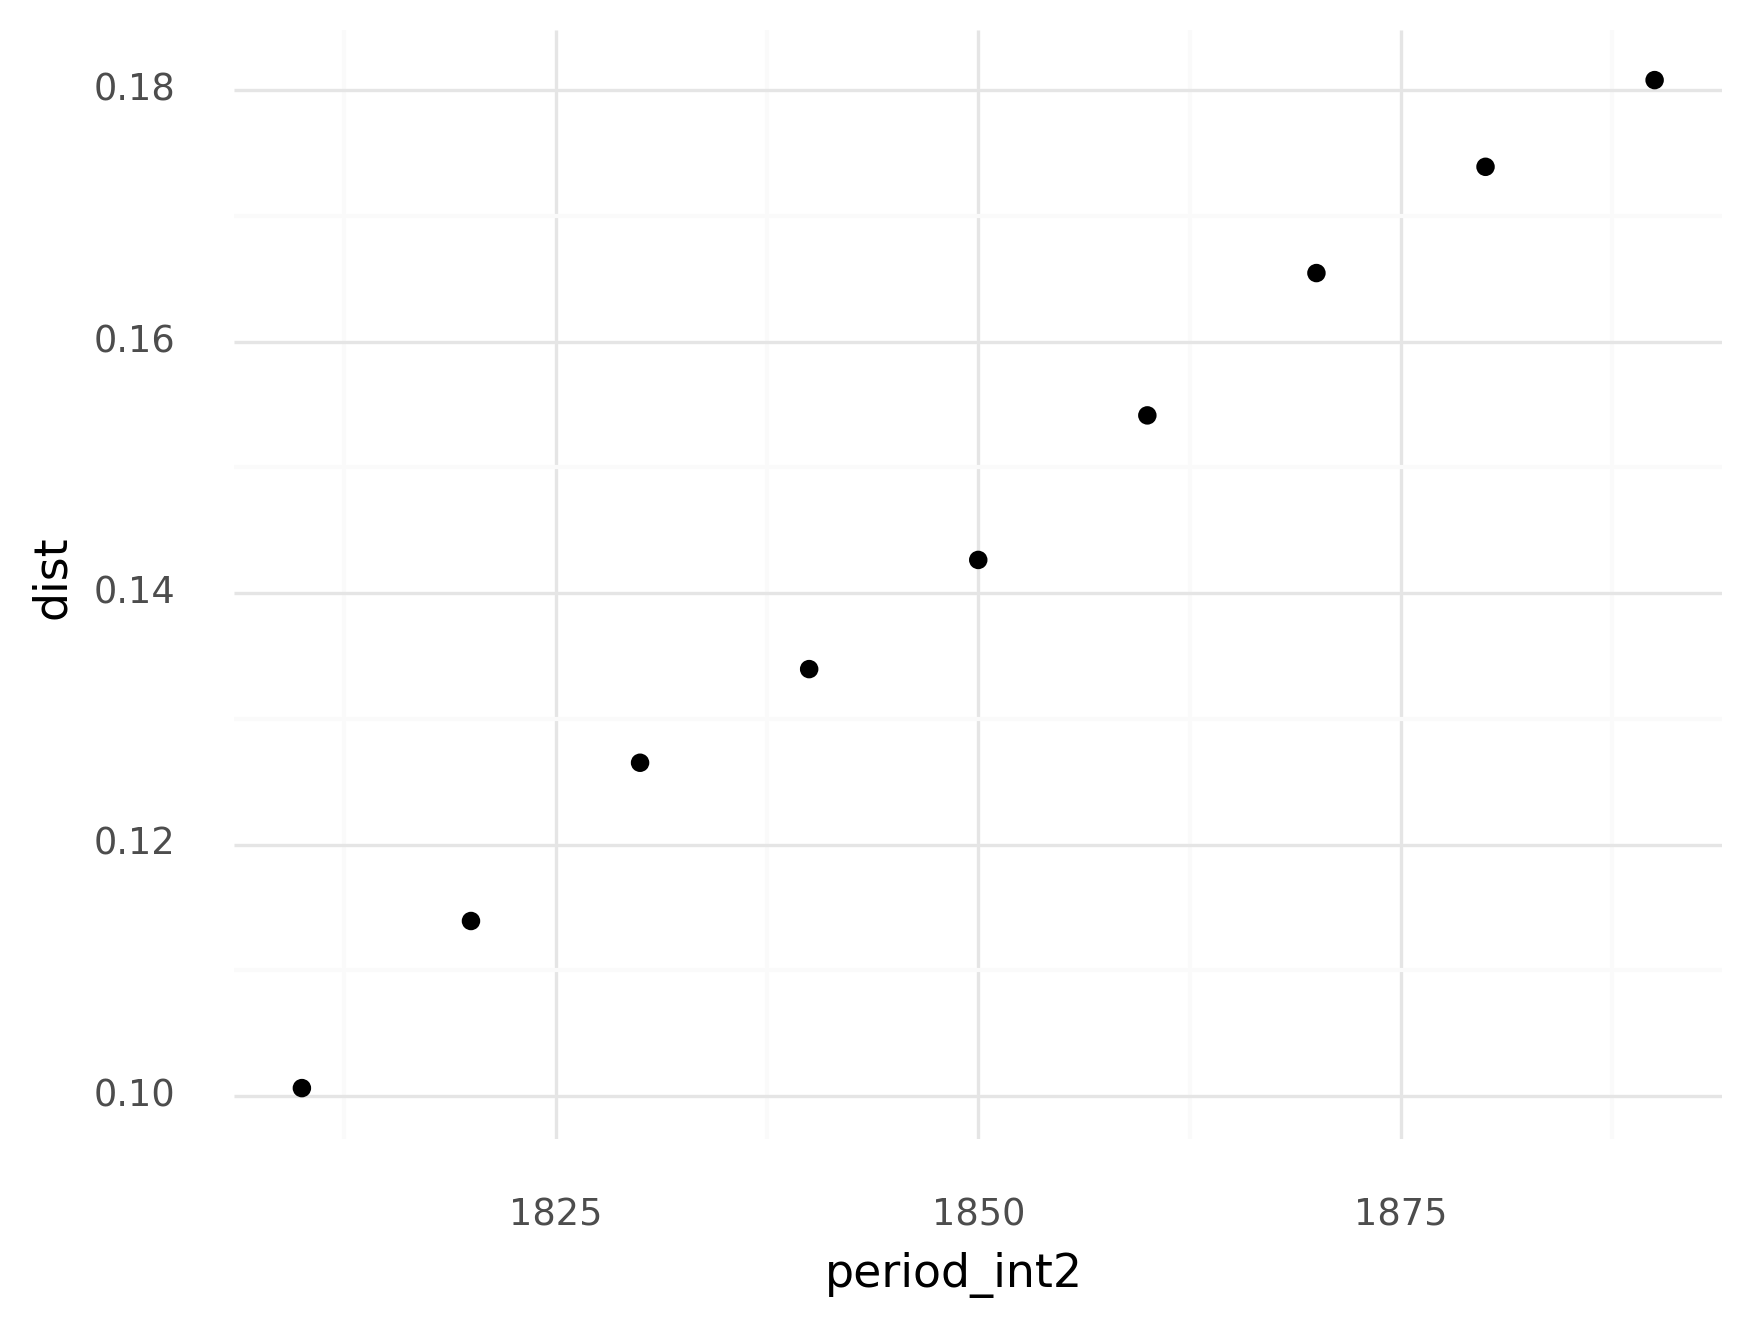

<ggplot: (8766937060201)>

In [41]:
figdf=pdf[pdf.period_int1==1800]
fig=p9.ggplot(figdf, p9.aes(x='period_int2',y='dist'))
fig+=p9.geom_point()
# fig+=p9.geom_line()
fig+=p9.theme_minimal()
fig

In [ ]:
figdf=pdf[pdf.period_int1==1800]
fig=p9.ggplot(figdf, p9.aes(x='period_int2',y='dist'))
fig+=p9.geom_point()
# fig+=p9.geom_line()
fig+=p9.theme_minimal()
fig

## Comparing words

In [8]:
wdf=df.groupby('word').mean().sort_values('perc_local',ascending=True)
wdf

rank       perc      dist  rank_abstractness  \
word                                                               
breeze       4901.357143  10.453982 -0.872882        4116.642857   
gloom        4830.660714  11.695994 -0.871116        3824.571429   
glow         4632.821429  14.927111 -0.808444        3503.214286   
zeal         4571.558824   9.050339 -0.983231        3699.588235   
piety        4391.602941  12.390216 -0.883220        3658.941176   
...                  ...        ...       ...                ...   
golfing       271.500000  95.483386  4.010220        1006.000000   
countryside    72.625000  98.802553  4.947662         224.000000   
kaffir        314.650000  94.730665  4.184615        1076.400000   
reliability   101.666667  98.315349  4.941316         324.666667   
cafe          930.750000  84.475705  5.374901        3695.000000   

             rank_noiseaware  rank_procrustes   rank_local  perc_abstractness  \
word                                                                            
breeze           5077.000000      5094.785714  5317.000000          24.986626   
gloom            5088.285714      5132.857143  5276.928571          30.810982   
glow             4871.071429      4892.071429  5264.928571          35.850030   
zeal             4876.176471      4864.000000  4846.470588          26.170173   
piety            4531.176471      4549.705882  4826.588235          26.486723   
...                      ...              ...          ...                ...   
golfing            18.000000        16.000000    46.000000          83.219235   
countryside        13.500000        13.000000    40.000000          96.271154   
kaffir             75.000000        73.200000    34.000000          81.927687   
reliability        24.666667        23.666667    33.666667          94.583894   
cafe                2.000000         2.000000    24.000000          38.320254   

             perc_noiseaware  perc_procrustes  ...  dist_abstractness  \
word                                           ...                      
breeze              7.251254         6.904579  ...          -0.689397   
gloom               6.712300         5.837079  ...          -0.593206   
glow               10.416119         9.931203  ...          -0.504503   
zeal                2.993596         3.163794  ...          -0.682624   
piety               9.545172         9.310180  ...          -0.688839   
...                      ...              ...  ...                ...   
golfing            99.716146        99.749541  ...           0.686016   
countryside        99.791108        99.799457  ...           3.325499   
kaffir             98.759366        98.789528  ...           3.403635   
reliability        99.603732        99.620465  ...           2.541552   
cafe               99.983303        99.983303  ...          -0.472791   

             dist_noiseaware  dist_procrustes  dist_local  \
word                                                        
breeze             -1.075720        -1.080683   -0.645728   
gloom              -1.120735        -1.134842   -0.635680   
glow               -1.040344        -1.045688   -0.643241   
zeal               -1.319320        -1.265467   -0.665514   
piety              -1.096596        -1.077494   -0.669950   
...                      ...              ...         ...   
golfing             5.864185         5.899368    3.591309   
countryside         6.361348         6.454331    3.649472   
kaffir              3.712160         3.764927    5.857738   
reliability         5.998016         6.078175    5.147521   
cafe                8.191550         8.311135    5.469707   

             score1_abstractness  score2_abstractness  \
word                                                    
breeze                 -1.015489            -1.033376   
gloom                  -0.044728             0.001172   
glow                   -0.234710            -0.267295   
zeal                    1.859856             1.79448

In [9]:
wdf.head(25)

rank       perc      dist  rank_abstractness  \
word                                                             
breeze     4901.357143  10.453982 -0.872882        4116.642857   
gloom      4830.660714  11.695994 -0.871116        3824.571429   
glow       4632.821429  14.927111 -0.808444        3503.214286   
zeal       4571.558824   9.050339 -0.983231        3699.588235   
piety      4391.602941  12.390216 -0.883220        3658.941176   
gi         3345.441176  31.683804 -0.507643        2976.411765   
pe         3767.750000  23.938992 -0.637355        3285.882353   
blaze      4247.678571  21.864058 -0.652447        2704.142857   
gleam      4348.232143  20.837738 -0.657381        3066.714286   
pa         3778.117647  23.912147 -0.644409        3454.000000   
sincerity  3980.147059  21.769007 -0.653250        2634.882353   
gratitude  4379.941176  14.202942 -0.831463        3512.058824   
ant        3015.911765  38.780592 -0.274342        2476.764706   
contempt   4304.485294  15.736445 -0.782284        3173.647059   
esteem     4384.941176  13.148596 -0.856626        3598.529412   
shame      3979.544118  21.372156 -0.667435        2942.235294   
remorse    4094.392857  25.738695 -0.509427        2614.714286   
tit        3577.823529  27.703588 -0.584252        2717.705882   
radiance   4417.865385  20.242185 -0.674284        3296.461538   
gaze       4681.089286  14.473375 -0.811435        3674.928571   
sorrow     4307.500000  15.664426 -0.778689        3301.647059   
knowledge  4584.073529   9.712095 -0.953724        3783.764706   
glare      4295.339286  21.708605 -0.618683        3445.642857   
sunshine   3758.208333  34.090078 -0.302764        2404.416667   
tole       2350.852941  51.482622  0.180632        1849.941176   

           rank_noiseaware  rank_procrustes   rank_local  perc_abstractness  \
word                                                                          
breeze         5077.000000      5094.785714  5317.000000          24.986626   
gloom          5088.285714      5132.857143  5276.928571          30.810982   
glow           4871.071429      4892.071429  5264.928571          35.850030   
zeal           4876.176471      4864.000000  4846.470588          26.170173   
piety          4531.176471      4549.705882  4826.588235          26.486723   
gi             2826.294118      2772.529412  4806.529412          40.567004   
pe             3455.823529      3514.647059  4814.647059          33.493102   
blaze          4507.571429      4595.500000  5183.500000          50.642557   
gleam          4512.428571      4596.071429  5217.714286          44.370986   
pa             3417.058824      3474.764706  4766.647059          30.875364   
sincerity      4242.588235      4254.529412  4788.588235          49.258892   
gratitude      4605.235294      4550.117647  4852.352941          31.560429   
ant            2413.117647      2418.705882  4755.058824          50.579612   
contempt       4608.882353      4611.411765  4824.000000          37.429164   
esteem         4595.470588      4554.529412  4791.235294          28.459617   
shame          4101.705882      4118.941176  4755.294118          41.563804   
remorse        4296.785714      4317.142857  5148.928571          52.810678   
tit            3388.411765      3504.470588  4700.705882          46.017540   
radiance       4573.000000      4607.692308  5194.307692          40.072547   
gaze           4980.000000      4962.642857  5106.785714          32.879283   
sorrow         4601.176471      4550.000000  4777.176471          34.909650   
knowledge      4913.058824      4916.294118  4723.176471          26.510591   
glare          4298.357143      4336.928571  5100.428571          37.487906   
sunshine       3701.583333      3661.500000  5265.333333          58.471787   
tole           1446.705882      1428.647059  4678.117647          60.817940   

           perc_noiseaware  perc_procrustes  ...  dist_abstractness  \
word                          

In [10]:
abs_z=get_dfchange_simple(col='mean1').sort_values('Abs-Conc.Median')
abs_z

Abs-Conc.Median  Active-Passive.HGI  Ambig.NX  Collective-Indiv.RH  \
word                                                                            
wood             -2.239772            1.550340 -0.056971            -0.707931   
cellar           -2.222373            1.489375 -0.079822            -0.880665   
top              -2.194921            1.260508  0.112349            -0.193313   
lace             -2.175315            1.056106 -0.106923            -1.058155   
park             -2.159580            1.793706 -0.236324            -1.052263   
...                    ...                 ...       ...                  ...   
mankind           2.687675           -2.367515 -0.086879             2.785990   
equity            2.704236           -1.081384  0.411703             0.416924   
prudence          2.711685           -2.061868  0.019962             0.194422   
prejudice         2.818907           -1.331873  0.461401            -0.001440   
wisdom            2.862611           -2.127569 -0.146365             1.386415   

             Freq.M  Human-Object.VG  Interp-Desc.HGI  Judg-Perc.HGI  \
word                                                                   
wood       0.598253        -1.896549        -2.181985      -0.694018   
cellar    -0.249216        -1.451278        -2.343952      -0.109969   
top        0.394547        -2.410528        -2.472234      -1.961046   
lace      -0.047166        -1.168882        -2.085009       0.046533   
park       0.141983        -0.229584        -2.291485       0.007475   
...             ...              ...              ...            ...   
mankind    1.024389         1.270544         2.625221      -0.341465   
equity    -0.142540         1.461717         2.877574       0.093850   
prudence   0.041016         1.588230         2.722205      -0.097725   
prejudice  0.228456         0.966801         2.792068      -0.752573   
wisdom     0.444012         1.645344         2.843327      -0.208113   

           Pleasure-Pain.HGI  Polit-Acad.HGI  Pos-Neg.HGI  Qual-Quant.HGI  \
word                                                                        
wood               -1.494796       -0.127153    -2.089853       -0.370917   
cellar             -1.496981        0.170621    -1.912026       -0.312900   
top                -1.457314        0.164409    -2.158474       -0.220502   
lace               -0.815950       -0.092905    -1.147388        0.080707   
park               -0.932780        0.478871    -1.451768        0.007381   
...                      ...             ...          ...             ...   
mankind             2.446991       -0.007280     2.588246       -0.016347   
equity              2.324934        1.113526     2.858906        0.141307   
prudence            2.908443        1.212339     2.962210        0.428823   
prejudice           1.484695        1.441105     1.911981       -0.496261   
wisdom              3.313300        0.713903     3.478948        0.441329   

           Sing-Plural.M  Strong-Weak.HGI  Time-Space.HGI  Virtue-Vice.HGI  \
word                                                                         
wood            0.208068         0.021619       -2.222954        -1.867266   
cellar         -0.293021        -0.345326       -0.880475        -1.643165   
top             0.241346        -0.197852       -1.931677        -1.764405   
lace           -0.078781        -0.543945       -1.215385        -1.039268   
park            0.121866         0.043219        0.002624        -1.298317   
...                  ...              ...             ...              ...   
mankind              NaN         0.474020       -0.391924         2.628929   
equity               NaN         1.954830        0.141157         2.860220   
prudence             NaN         1.286099       -0.043444         3.130754   
prejudice      -0.024813         1.573882       -0.183951         1.952111   
wisdom               NaN         1.622227       -0.139223         3.742223   

   

rank       perc      dist  rank_abstractness  \
word                                                               
breeze       4901.357143  10.453982 -0.872882        4116.642857   
gloom        4830.660714  11.695994 -0.871116        3824.571429   
glow         4632.821429  14.927111 -0.808444        3503.214286   
zeal         4571.558824   9.050339 -0.983231        3699.588235   
piety        4391.602941  12.390216 -0.883220        3658.941176   
...                  ...        ...       ...                ...   
golfing       271.500000  95.483386  4.010220        1006.000000   
countryside    72.625000  98.802553  4.947662         224.000000   
kaffir        314.650000  94.730665  4.184615        1076.400000   
reliability   101.666667  98.315349  4.941316         324.666667   
cafe          930.750000  84.475705  5.374901        3695.000000   

             rank_noiseaware  rank_procrustes   rank_local  perc_abstractness  \
word                                                                            
breeze           5077.000000      5094.785714  5317.000000          24.986626   
gloom            5088.285714      5132.857143  5276.928571          30.810982   
glow             4871.071429      4892.071429  5264.928571          35.850030   
zeal             4876.176471      4864.000000  4846.470588          26.170173   
piety            4531.176471      4549.705882  4826.588235          26.486723   
...                      ...              ...          ...                ...   
golfing            18.000000        16.000000    46.000000          83.219235   
countryside        13.500000        13.000000    40.000000          96.271154   
kaffir             75.000000        73.200000    34.000000          81.927687   
reliability        24.666667        23.666667    33.666667          94.583894   
cafe                2.000000         2.000000    24.000000          38.320254   

             perc_noiseaware  perc_procrustes  ...  dist_procrustes  \
word                                           ...                    
breeze              7.251254         6.904579  ...        -1.080683   
gloom               6.712300         5.837079  ...        -1.134842   
glow               10.416119         9.931203  ...        -1.045688   
zeal                2.993596         3.163794  ...        -1.265467   
piety               9.545172         9.310180  ...        -1.077494   
...                      ...              ...  ...              ...   
golfing            99.716146        99.749541  ...         5.899368   
countryside        99.791108        99.799457  ...         6.454331   
kaffir             98.759366        98.789528  ...         3.764927   
reliability        99.603732        99.620465  ...         6.078175   
cafe               99.983303        99.983303  ...         8.311135   

             dist_local  score1_abstractness  score2_abstractness  \
word                                                                
breeze        -0.645728            -1.015489            -1.033376   
gloom         -0.635680            -0.044728             0.001172   
glow          -0.643241            -0.234710            -0.267295   
zeal          -0.665514             1.859856             1.794480   
piety         -0.669950             1.759206             1.709323   
...                 ...                  ...                  ...   
golfing        3.591309             0.086054            -0.134349   
countryside    3.649472            -0.986537            -0.753480   
kaffir         5.857738             0.180874             0.043195   
reliability    5.147521             0.310910             0.339839   
cafe           5.469707            -0.510719            -0.580861   

             score_diff_abstractness  is_clean_noiseaware   period_int  \
word                                                                     
breeze                     -0.017887             1.000000  1808.571429   
gloom                       0.045900 

In [12]:
# wdf.query('abs_z>1').head(25)

### Plot

In [15]:
@interact
def i_show_word(words='growth,improvement,value,liberty,republic,progress',y='perc_local'):
    words={x.strip().lower() for x in words.split(',') if x.strip()}
    figdf=df[df.word.isin(words)][['word','period_int',y]].dropna().sort_values(['word','period_int'])
    figdf=figdf.groupby('word').rolling(3,min_periods=2).mean().reset_index()
    
    fig=p9.ggplot(
        figdf,
        p9.aes(
            x='period_int',
            y='perc_local',
            color='word')
    ) + p9.geom_point() + p9.geom_line() +p9.theme_minimal()
    return fig

interactive(children=(Text(value='growth,improvement,value,liberty,republic,progress', description='words'), T…

### Do abstract words change more?

In [25]:
# df['period_satt']=df.period_int.apply(periodize_sattelzeit)
df['period_satt']=df.period_int.apply(to_halfcent)


swdf=df.groupby(['period_satt','word']).mean().reset_index().set_index('word')
swdf['abs_z']=abs_z['Abs-Conc.Median']
words_ever_abs=get_words_ever_abs()
swdf['ever_abs']=[('OnceAbs' if w in words_ever_abs else 'NeverAbs') for w in swdf.index]
swdf=swdf.reset_index()
swdf

word period_satt       rank       perc      dist  \
0       abatement        C18e   594.5000  84.593553  1.311046   
1            abbe        C18e  2633.1250  30.115450 -0.605864   
2           abbey        C18e  2359.4375  31.819912 -0.576402   
3           abbot        C18e  2514.1250  24.317521 -0.894546   
4      abdication        C18e   567.2500  82.009956  1.114264   
...           ...         ...        ...        ...       ...   
21761        zest        C19l  3710.5000  37.902301 -0.387157   
21762        zinc        C19l  2782.5625  53.420456 -0.037375   
21763        zone        C19l  2340.0625  60.872874  0.095955   
21764         zoo        C19l   526.0625  91.190646  3.481183   
21765     zoology        C19l  1889.1250  68.381270  0.102662   

       rank_abstractness  rank_noiseaware  rank_procrustes  rank_local  \
0                1547.50           251.00           252.50       327.0   
1                2407.50          2740.00          2873.50      2511.5   
2                1997.25          2590.75          2587.25      2262.5   
3                1903.75          3080.00          2993.75      2079.0   
4                 334.50           603.50           468.00       863.0   
...                  ...              ...              ...         ...   
21761            4190.00          3203.75          3163.25      4285.0   
21762            1860.00          2378.50          2388.25      4503.5   
21763            2759.25          2382.00          2339.50      1879.5   
21764             536.00            91.75            96.00      1380.5   
21765            1809.00          2159.50          2177.00      1411.0   

       perc_abstractness  ...  dist_procrustes  dist_local  \
0              58.383798  ...         1.761340    1.661378   
1              40.871558  ...        -0.838596   -0.525458   
2              43.473760  ...        -0.784474   -0.457860   
3              42.949146  ...        -1.309180   -0.419642   
4              89.992322  ...         1.315288    0.578217   
...                  ...  ...              ...         ...   
21761          29.874114  ...        -0.295777   -0.352883   
21762          68.865127  ...        -0.051504   -0.377968   
21763          53.862168  ...         0.045911    0.298477   
21764          91.019493  ...         3.948232    2.637733   
21765          69.740027  ...         0.031270    0.085866   

       score1_abstractness  score2_abstractness  score_diff_abstractness  \
0                 0.059404             0.039731                -0.019673   
1                 0.019416             0.304199                 0.284783   
2                -0.976185            -1.106180                -0.129995   
3                 0.034684            -0.111785                -0.146469   
4                 1.316116             0.509322                -0.806794   
...                    ...                  ...                      ...   
21761             0.611612             0.624365                 0.012753   
21762            -1.279351            -1.318025                -0.038674   
21763            -0.745938            -0.654137                 0.091801   
21764            -0.920520            -0.805036                 0.115484   
21765            -0.077291            -0.083867                -0.006576   

       is_clean_noiseaware  period_int      perc2     abs_z  ever_abs  
0                     1.00      1735.0  93.684801  0.335347   OnceAbs  
1                     1.00      1735.0  22.743362  0.298957   OnceAbs  
2                     1.00      1725.0  25.587012 -1.011041  NeverAbs  
3                     1.00      1725.0  31.175893 -0.088761  NeverAbs  
4                     1.00      1725.0  72.844994  0.879508   OnceAbs  
...                    ...         ...        ...       ...       ...  
21761                 1.00      1865.0  37.638576       NaN  NeverAbs  
21762                 1.00      1865.0  33.995304 -0.434977  NeverAbs  
21763                 1.00      1865.

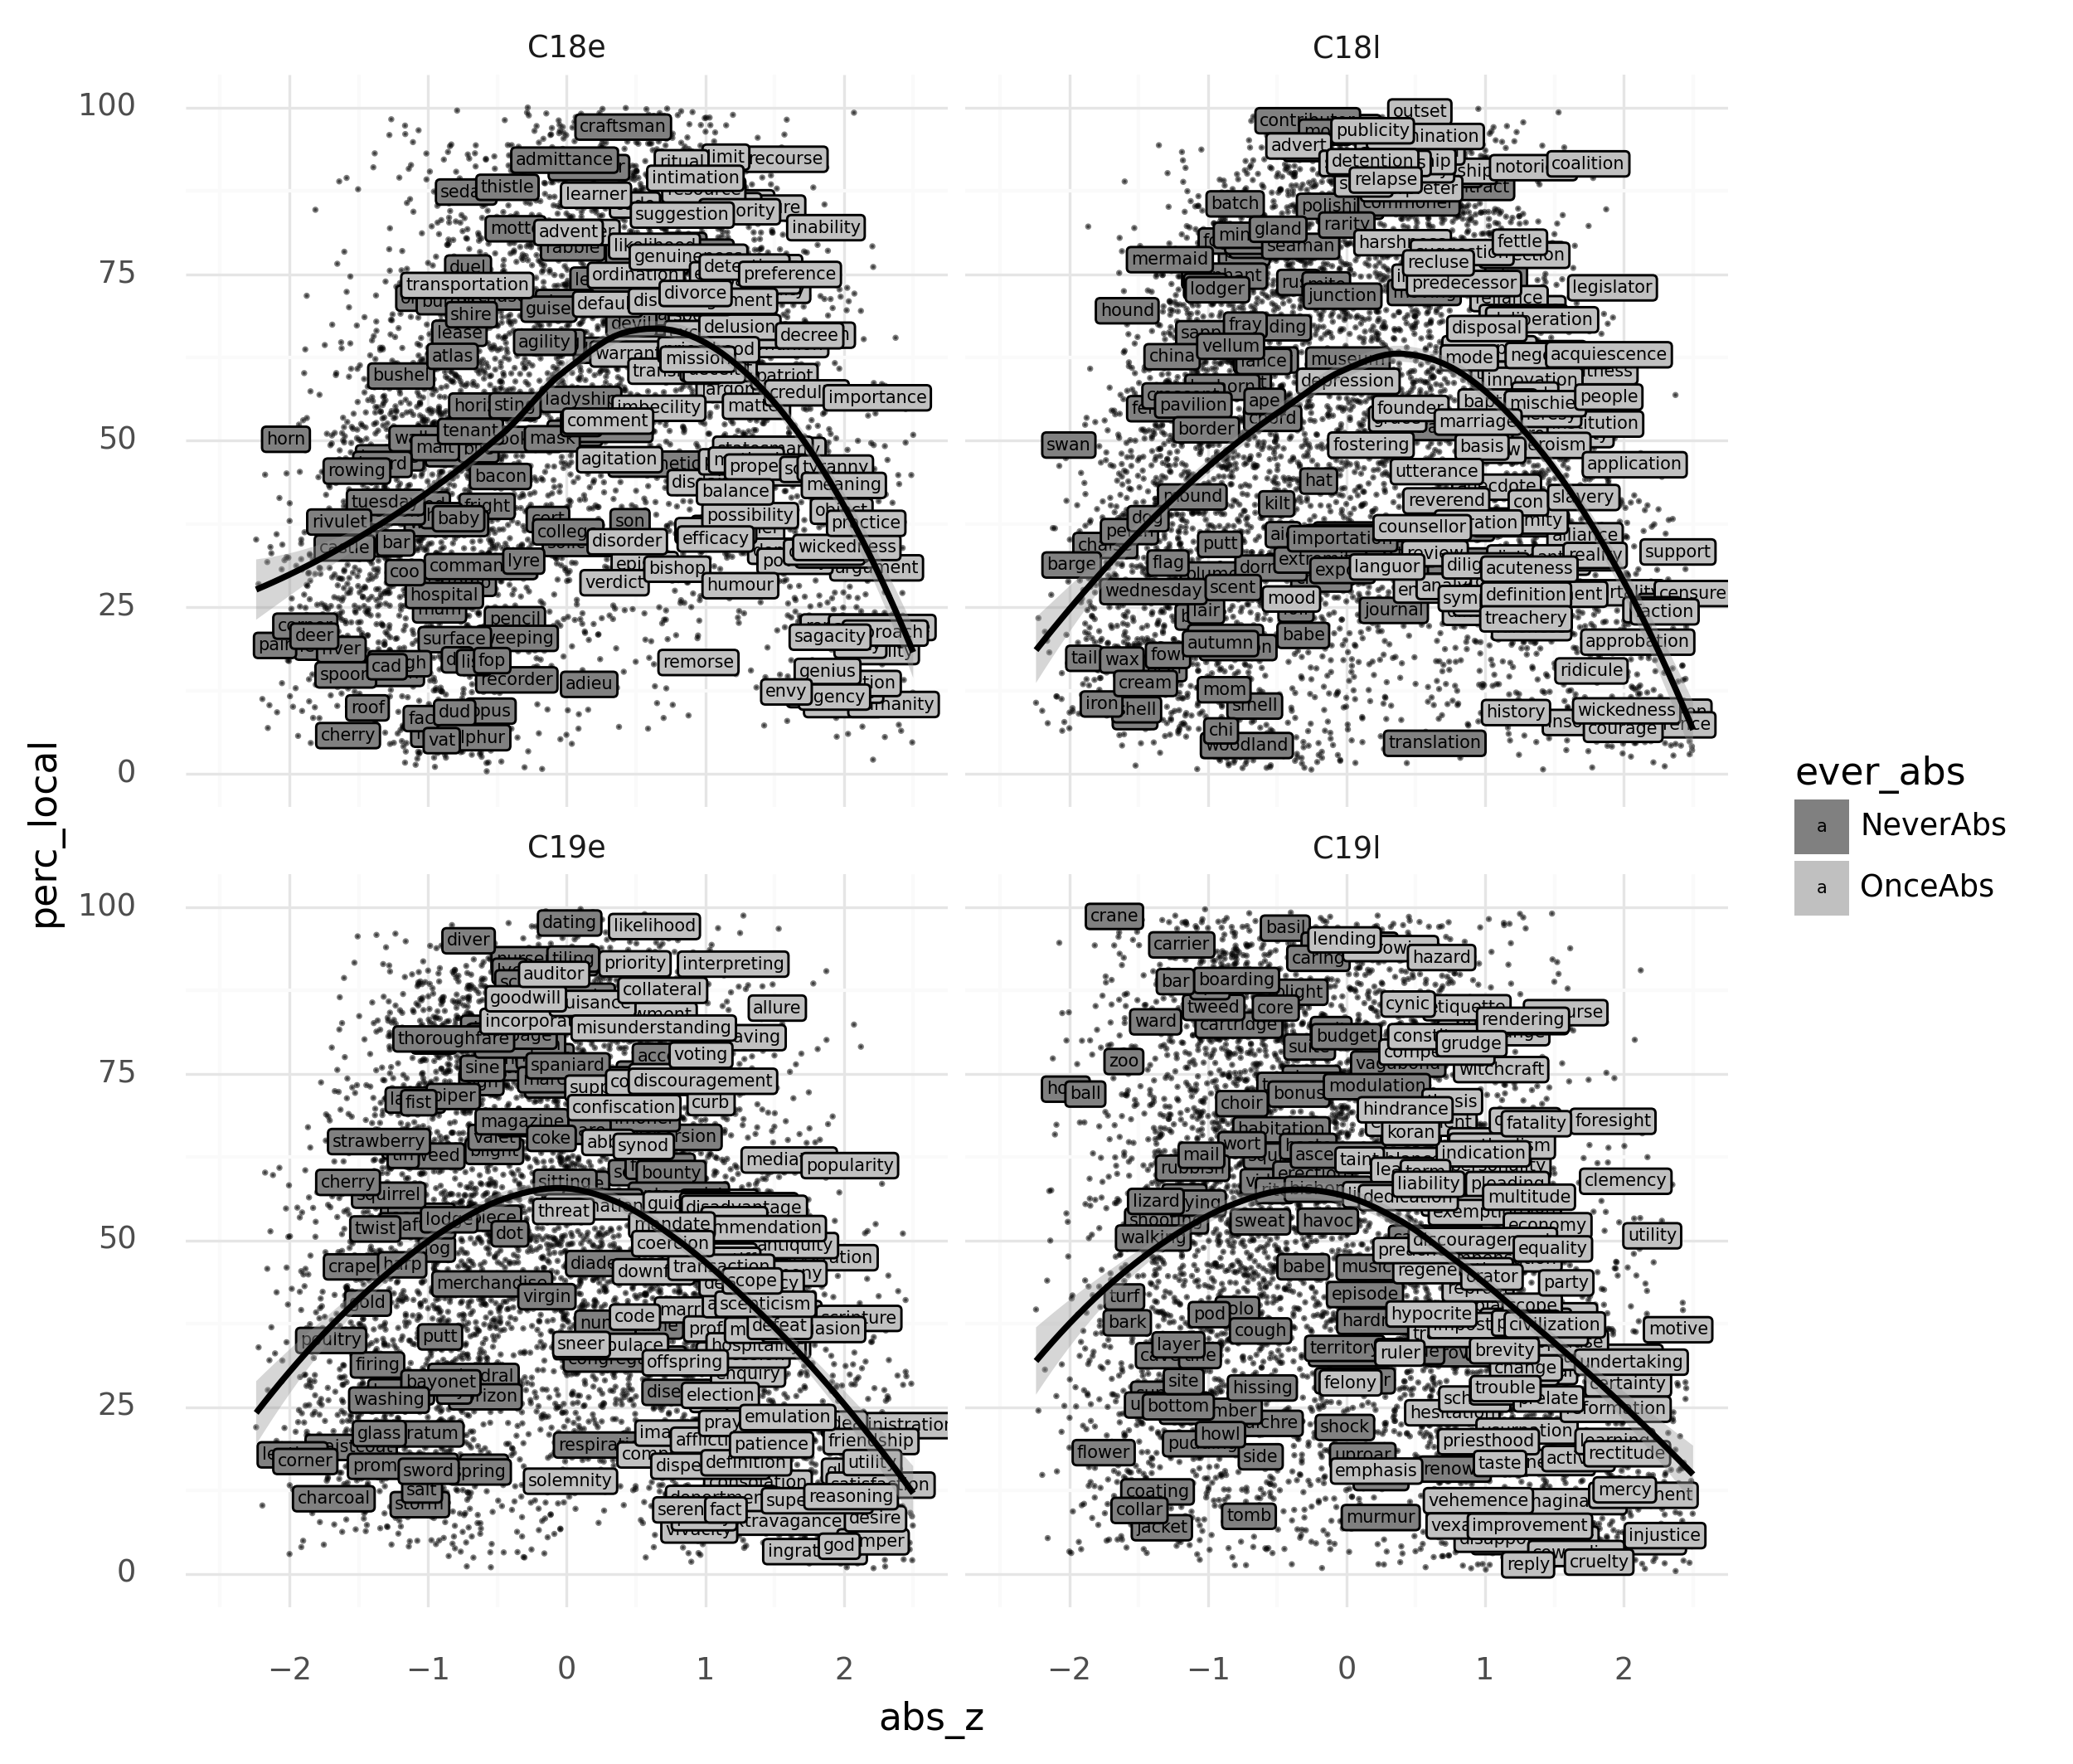

<ggplot: (8773137477753)>

In [27]:
figdf=swdf.reset_index()
labeldf=figdf.groupby(['period_satt','ever_abs']).sample(n=100)

p9.options.figure_size=8,8
fig=p9.ggplot(
    figdf,
    p9.aes(x='abs_z',y='perc_local',label='word')
)
fig+=p9.geom_point(size=.01,alpha=0.5)
# fig+=p9.ylim(-1.35,2)
fig+=p9.xlim(-2.5,2.5)
fig+=p9.geom_label(p9.aes(fill='ever_abs'),size=5, data=labeldf, alpha=1)
fig+=p9.geom_smooth(method='loess')
fig+=p9.facet_wrap('period_satt')
# fig+=p9.geom_text(size=5, data=labeldf, alpha=1)
fig+=p9.theme_minimal()
fig+=p9.scale_fill_manual({'NeverAbs':'gray','OnceAbs':'silver'})
fig

In [65]:
abswords=get_words_ever_abs()

In [66]:
wdf['is_abs']=['Abs' if x in abswords else 'NotAbs' for x in wdf.index]
wdf

rank       perc      dist  rank_abstractness  \
word                                                               
breeze       4901.357143  10.453982 -0.872882        4116.642857   
gloom        4830.660714  11.695994 -0.871116        3824.571429   
glow         4632.821429  14.927111 -0.808444        3503.214286   
zeal         4571.558824   9.050339 -0.983231        3699.588235   
piety        4391.602941  12.390216 -0.883220        3658.941176   
...                  ...        ...       ...                ...   
golfing       271.500000  95.483386  4.010220        1006.000000   
countryside    72.625000  98.802553  4.947662         224.000000   
kaffir        314.650000  94.730665  4.184615        1076.400000   
reliability   101.666667  98.315349  4.941316         324.666667   
cafe          930.750000  84.475705  5.374901        3695.000000   

             rank_noiseaware  rank_procrustes   rank_local  perc_abstractness  \
word                                                                            
breeze           5077.000000      5094.785714  5317.000000          24.986626   
gloom            5088.285714      5132.857143  5276.928571          30.810982   
glow             4871.071429      4892.071429  5264.928571          35.850030   
zeal             4876.176471      4864.000000  4846.470588          26.170173   
piety            4531.176471      4549.705882  4826.588235          26.486723   
...                      ...              ...          ...                ...   
golfing            18.000000        16.000000    46.000000          83.219235   
countryside        13.500000        13.000000    40.000000          96.271154   
kaffir             75.000000        73.200000    34.000000          81.927687   
reliability        24.666667        23.666667    33.666667          94.583894   
cafe                2.000000         2.000000    24.000000          38.320254   

             perc_noiseaware  perc_procrustes  ...  dist_local  \
word                                           ...               
breeze              7.251254         6.904579  ...   -0.645728   
gloom               6.712300         5.837079  ...   -0.635680   
glow               10.416119         9.931203  ...   -0.643241   
zeal                2.993596         3.163794  ...   -0.665514   
piety               9.545172         9.310180  ...   -0.669950   
...                      ...              ...  ...         ...   
golfing            99.716146        99.749541  ...    3.591309   
countryside        99.791108        99.799457  ...    3.649472   
kaffir             98.759366        98.789528  ...    5.857738   
reliability        99.603732        99.620465  ...    5.147521   
cafe               99.983303        99.983303  ...    5.469707   

             score1_abstractness  score2_abstractness  \
word                                                    
breeze                 -1.015489            -1.033376   
gloom                  -0.044728             0.001172   
glow                   -0.234710            -0.267295   
zeal                    1.859856             1.794480   
piety                   1.759206             1.709323   
...                          ...                  ...   
golfing                 0.086054            -0.134349   
countryside            -0.986537            -0.753480   
kaffir                  0.180874             0.043195   
reliability             0.310910             0.339839   
cafe                   -0.510719            -0.580861   

             score_diff_abstractness  is_clean_noiseaware   period_int  \
word                                                                     
breeze                     -0.017887             1.000000  1808.571429   
gloom                       0.045900             1.000000  1808.571429   
glow                       -0.032585             1.000000  1808.571429   
zeal                       -0.065377             0.941176  1792.941176   
piety                      -0.049883

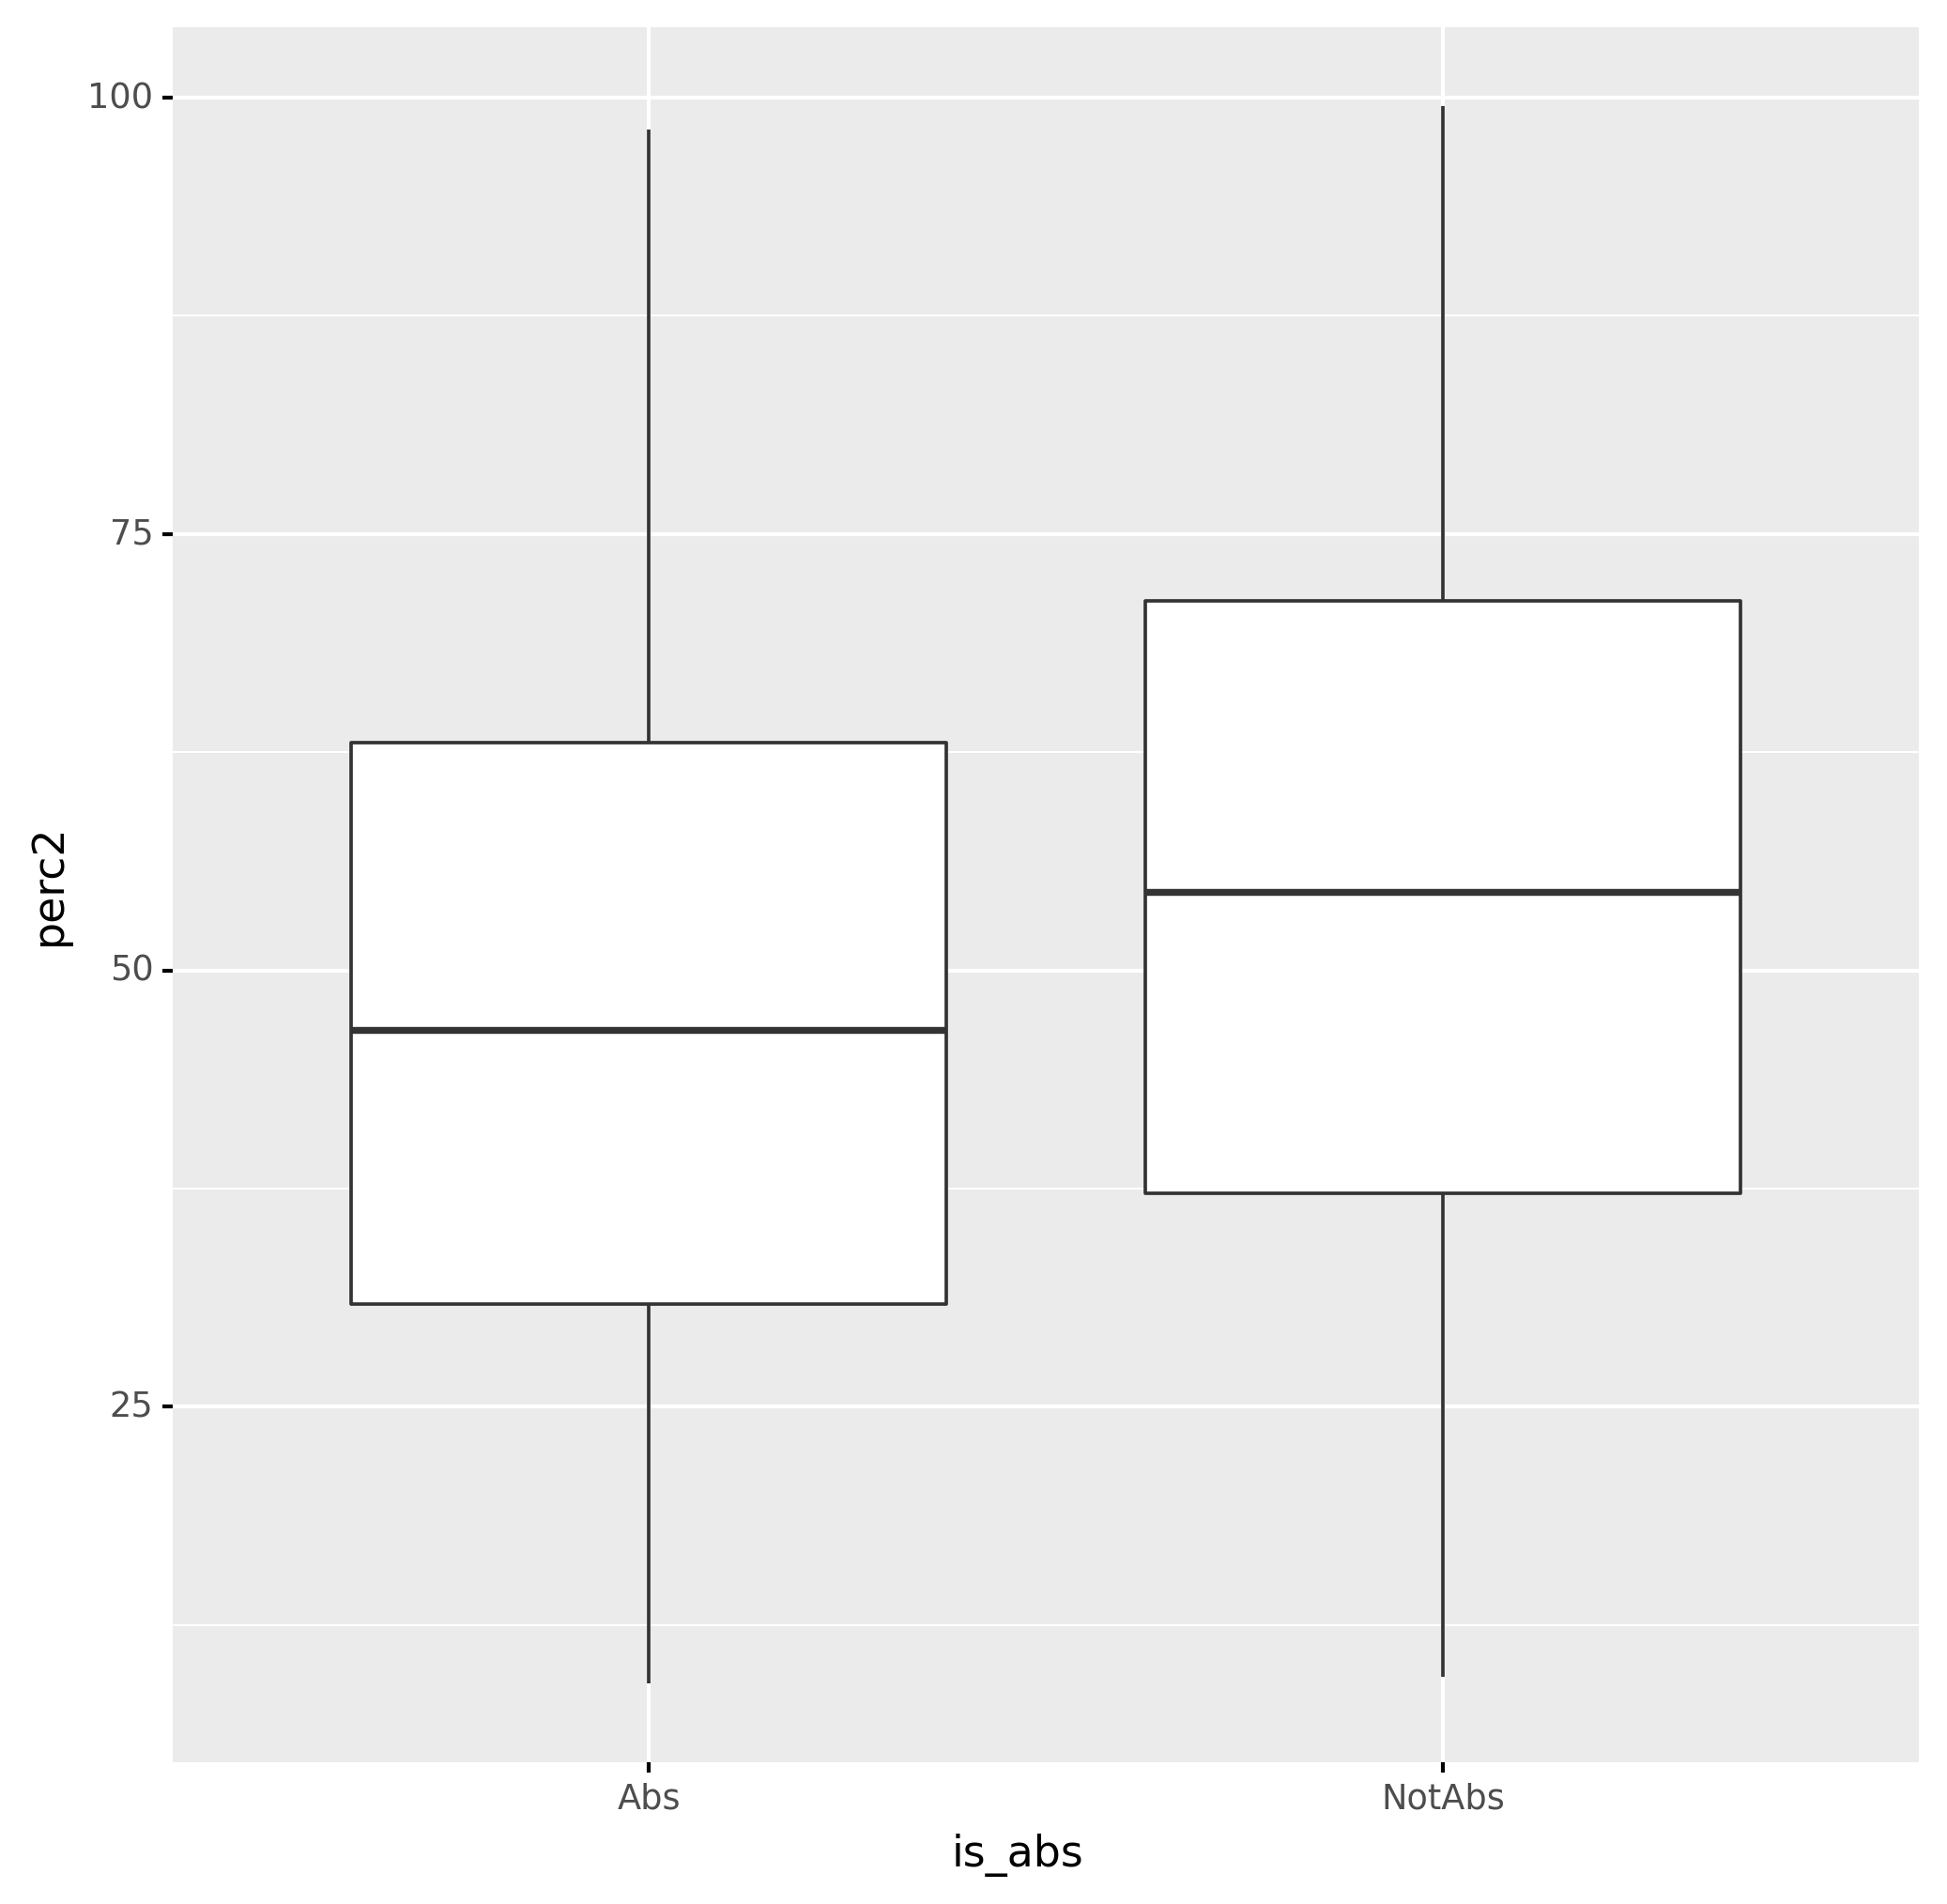

<ggplot: (8740342805857)>

In [67]:
fig=p9.ggplot(wdf, p9.aes(x='is_abs',y='perc2'))
fig+=p9.geom_boxplot()
fig

# Word boxplots?

In [68]:
pwdf=df.groupby(['period','word']).mean()
pwdf

rank       perc      dist  rank_abstractness  \
period       word                                                          
1700s->1710s abbey       1270.50  57.313383  0.069394              550.0   
             abbot       2483.00  16.543376 -1.004516             1947.0   
             abdication   940.25  68.417956  0.392115              446.0   
             abhorrence   953.50  67.972428  0.336998              481.0   
             ability      751.25  74.773033  0.555452              660.0   
...                          ...        ...       ...                ...   
1870s->1880s zest        3990.00  33.394557 -0.464658             4864.0   
             zinc        2896.50  51.653031 -0.142794             2464.0   
             zone        3243.00  45.867424 -0.329695             3948.0   
             zoo           12.75  99.803807  7.082957               19.0   
             zoology     1423.75  76.243947  0.298290             1326.0   

                         rank_noiseaware  rank_procrustes  rank_local  \
period       word                                                       
1700s->1710s abbey                1680.0           1694.0      1158.0   
             abbot                2834.0           2725.0      2426.0   
             abdication           1021.0            827.0      1467.0   
             abhorrence           1260.0           1041.0      1032.0   
             ability               640.0            509.0      1196.0   
...                                  ...              ...         ...   
1870s->1880s zest                 3450.0           3495.0      4151.0   
             zinc                 2444.0           2430.0      4248.0   
             zone                 3207.0           3201.0      2616.0   
             zoo                    10.0             12.0        10.0   
             zoology              1622.0           1640.0      1107.0   

                         perc_abstractness  perc_noiseaware  perc_procrustes  \
period       word                                                              
1700s->1710s abbey               81.540013        43.544048        43.073302   
             abbot               34.566241         4.741089         8.406187   
             abdication          85.036987        65.702757        72.225958   
             abhorrence          83.860121        57.666443        65.030262   
             ability             77.841291        78.513786        82.918628   
...                                    ...              ...              ...   
1870s->1880s zest                18.801135        42.411087        41.659709   
             zinc                58.874603        59.208549        59.442311   
             zone                34.095842        46.468526        46.568709   
             zoo                 99.699449        99.849724        99.816330   
             zoology             77.876106        72.933712        72.633161   

                         ...  dist_abstractness  dist_noiseaware  \
period       word        ...                                       
1700s->1710s abbey       ...           0.869422        -0.240646   
             abbot       ...          -0.578048        -1.478884   
             abdication  ...           1.044564         0.294725   
             abhorrence  ...           0.971554         0.099966   
             ability     ...           0.682457         0.726658   
...                      ...                ...              ...   
1870s->1880s zest        ...          -0.766432        -0.375124   
             zinc        ...          -0.088511        -0.074849   
             zone        ...          -0.539322        -0.308217   
             zoo         ...           5.469729         6.517564   
             zoology     ...           0.453950         0.279110   

                         dist_procrustes  dist_local  score1_abstractness  \
period       word                                                           
1700s->17

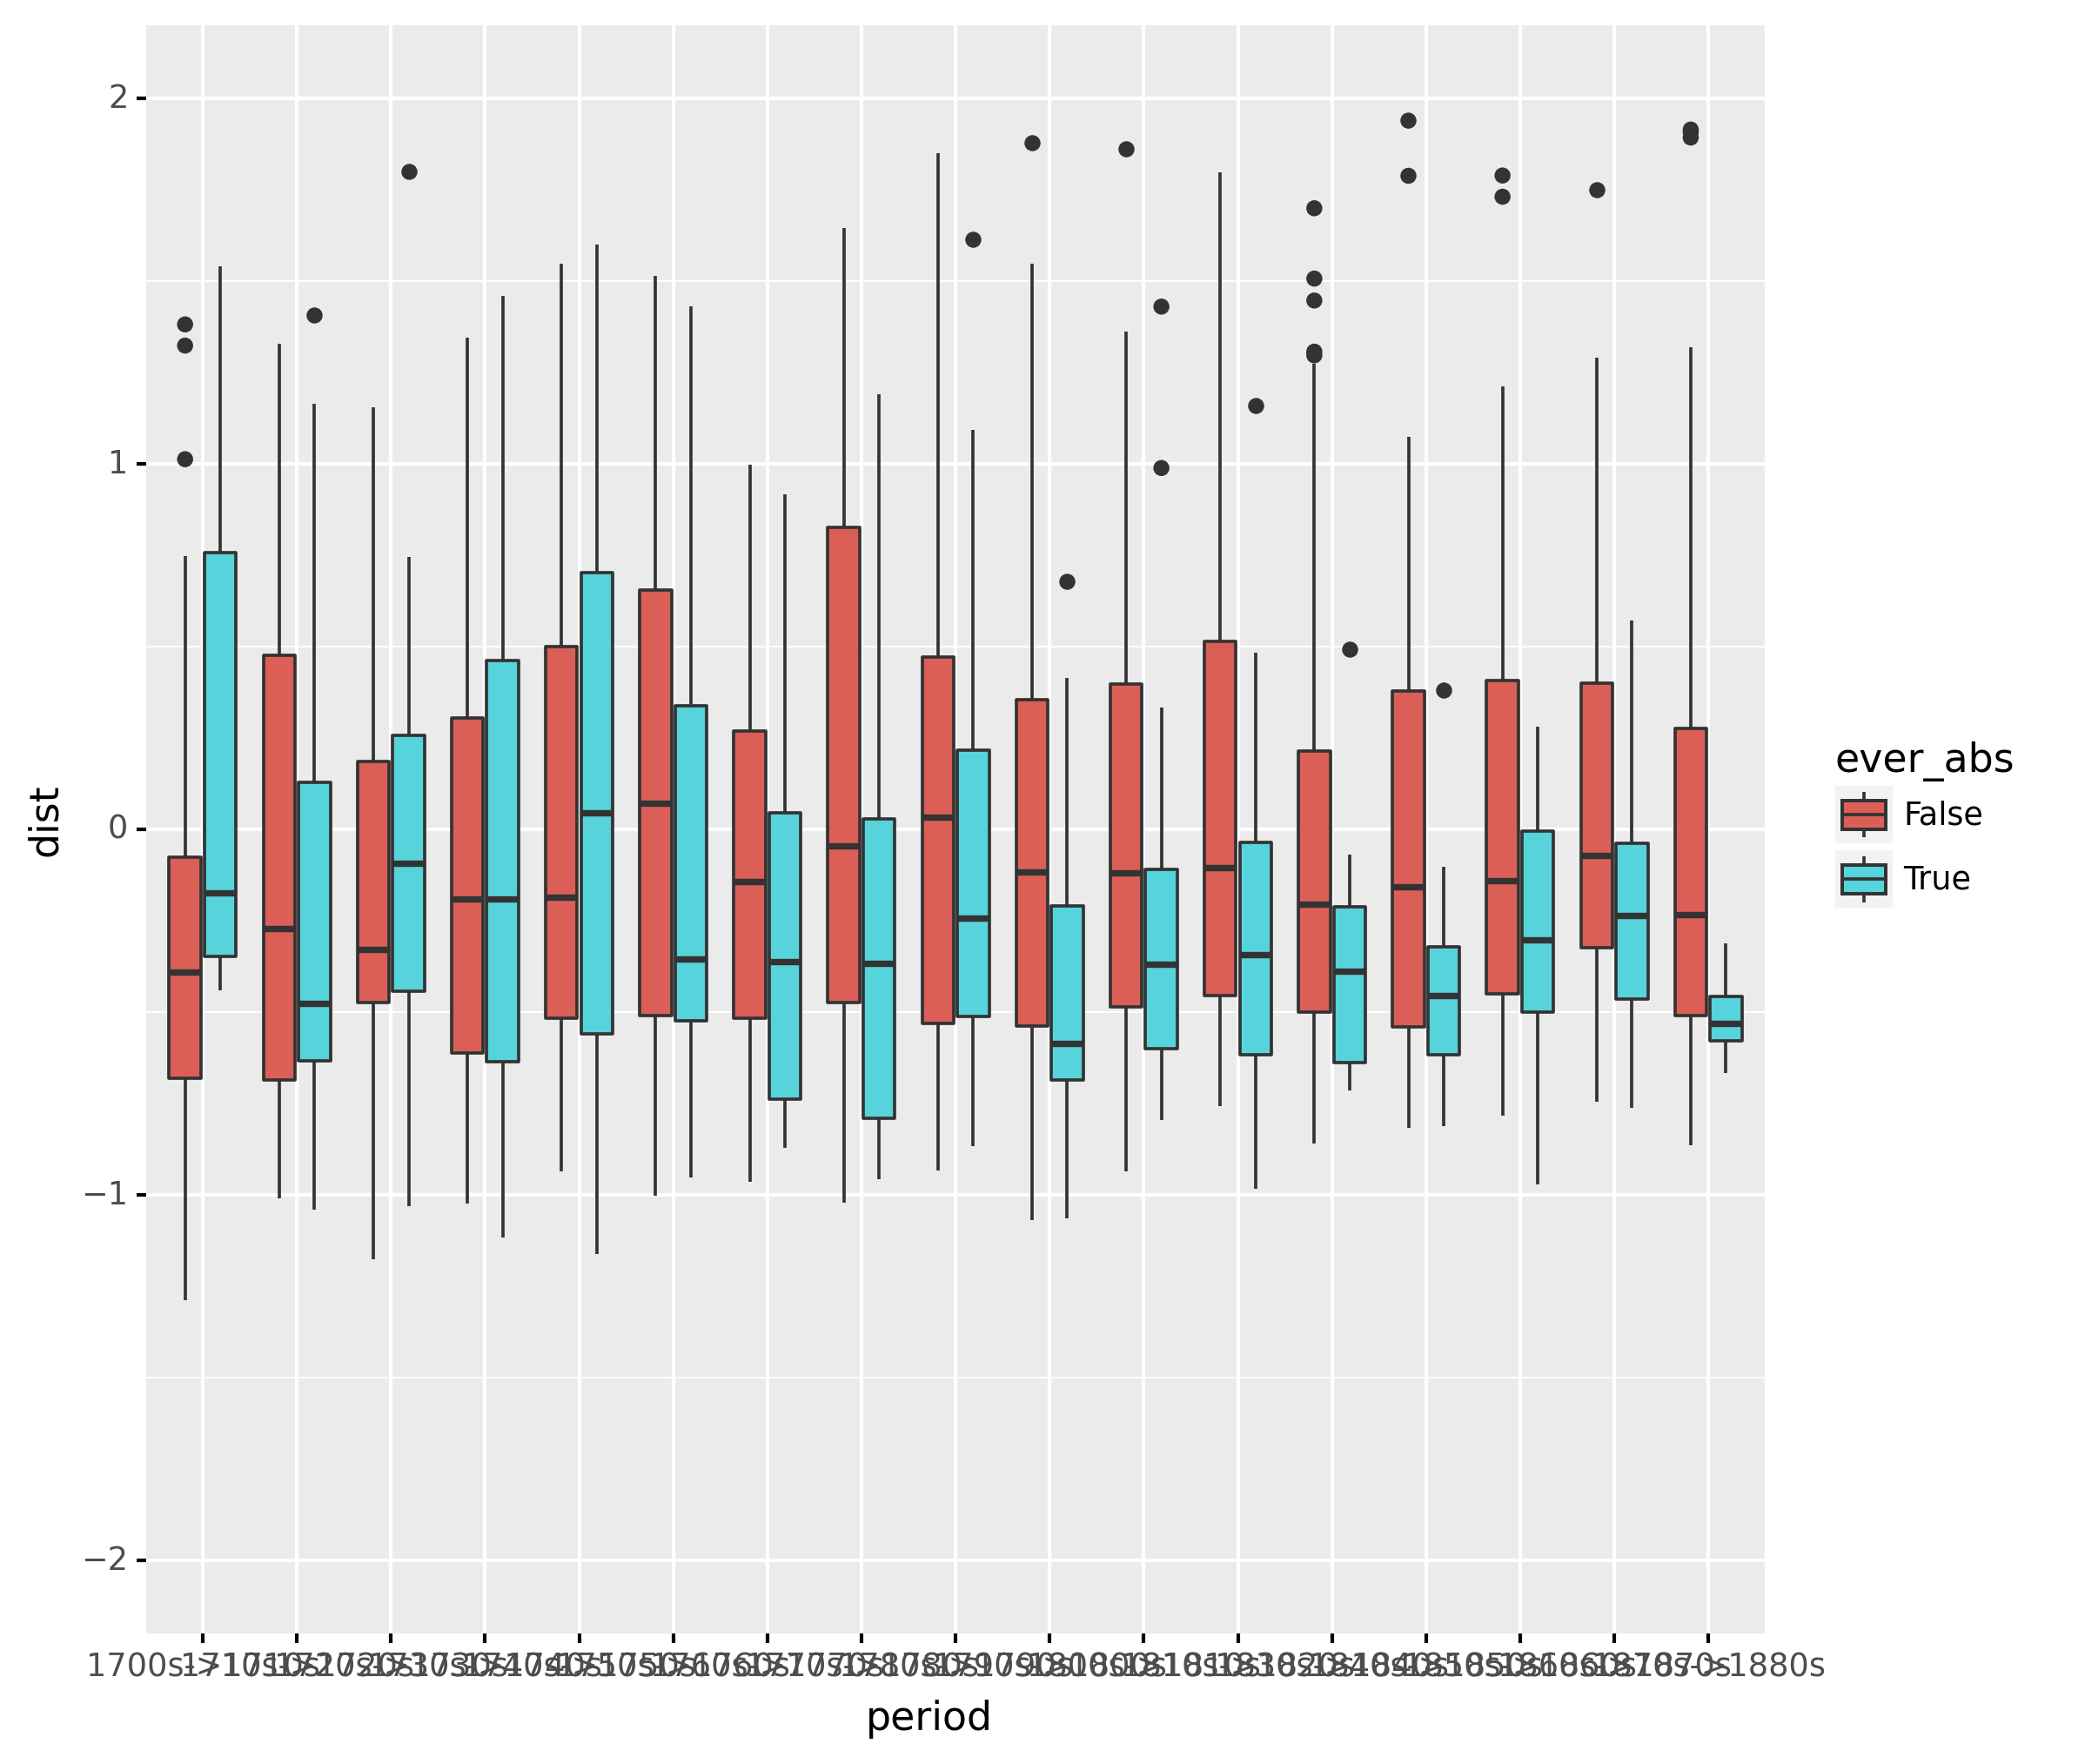

<ggplot: (8740342784565)>

In [69]:
figdf=pwdf.reset_index().sample(n=1000)
figdf['ever_abs']=figdf.word.apply(lambda x: x in words_ever_abs)
p9.ggplot(
    figdf, p9.aes(x='period',y='dist',fill='ever_abs')
) + p9.geom_boxplot() + p9.ylim(-2,2)

In [168]:
figdf

period          word     rank       perc      dist  \
46882  1800s->1810s      illusion  2839.25  50.241059 -0.102510   
11899  1730s->1740s        patron  3085.75  29.796313 -0.624579   
4221   1710s->1720s          herd   918.75  68.602463  0.636160   
69325  1850s->1860s  dissertation  2936.25  50.825096 -0.196133   
76721  1860s->1870s        ledger  2453.00  58.996656  0.464921   
...             ...           ...      ...        ...       ...   
39742  1790s->1800s       collier  1416.25  74.296222  0.446476   
19347  1750s->1760s       disdain  2664.00  46.472362 -0.342030   
21608  1750s->1760s        quarry  2454.25  50.688442 -0.191844   
50176  1810s->1820s    annexation  1590.50  72.618432  1.474954   
71382  1850s->1860s        option  2526.25  57.693919  0.444188   

       rank_abstractness  rank_noiseaware  rank_procrustes  rank_local  \
46882             3499.0           2365.0           2364.0      3129.0   
11899             4306.0           3597.0           3587.0       853.0   
4221               354.0            619.0            613.0      2089.0   
69325             2222.0           4382.0           4388.0       753.0   
76721             3660.0            485.0            518.0      5149.0   
...                  ...              ...              ...         ...   
39742              442.0           2705.0           2512.0         6.0   
19347             3205.0           3650.0           3715.0        86.0   
21608             1983.0           3424.0           3452.0       958.0   
50176               62.0            510.0            494.0      5296.0   
71382              229.0           2508.0           2483.0      4885.0   

       perc_abstractness  ...  dist_abstractness  dist_noiseaware  \
46882          38.674614  ...          -0.481485        -0.072678   
11899           2.025489  ...          -1.168468        -0.966156   
4221           87.923366  ...           1.215021         0.733493   
69325          62.791087  ...          -0.001022        -0.615006   
76721          38.812709  ...          -0.475322         1.342269   
...                  ...  ...                ...              ...   
39742          91.990556  ...           1.519682        -0.245569   
19347          35.597990  ...          -0.554821        -0.785013   
21608          60.160804  ...          -0.037634        -0.660359   
50176          98.949182  ...           3.634431         1.428840   
71382          96.180265  ...           2.183246        -0.115344   

       dist_procrustes  dist_local  score1_abstractness  score2_abstractness  \
46882        -0.081318    0.225442             0.796774             0.900392   
11899        -0.986022    0.622330             1.513447             1.521549   
4221          0.741672   -0.145545             0.298907            -0.482863   
69325        -0.611814    0.443309             0.643221             0.510425   
76721         1.265530   -0.272794            -0.660377            -0.591267   
...                ...         ...                  ...                  ...   
39742        -0.165710    0.677503            -0.977403            -0.455819   
19347        -0.816823    0.788536             1.092014             0.966239   
21608        -0.688829    0.619444            -1.736808            -1.978052   
50176         1.450066   -0.613520             0.821901             0.016281   
71382        -0.106873   -0.184277             0.086107             0.501572   

       score_diff_abstractness  is_clean_noiseaware  period_int  ever_abs  
46882                 0.103618                 True        1810      True  
11899                 0.008102                 True        1740      True  
4221                 -0.781770                 True        1720     False  
69325                -0.132796                 True        1860     False  
76721                 0.069110                 True        1870     False  
...                        ...                  ...         ...       ...